Author: Mohona Yesmin

# Exploratory Data Analysis (EDA)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px

In [2]:
df = pd.read_csv('data/df_with_topics.csv')

In [3]:
df.head()

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,...,death_date,death_time,death_day,inc_date,inc_time,inc_day,long_topic,best_topic_num,best_topic_name,best_topic_perc
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,...,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday,"[(0, 0.0100428155), (1, 0.01559641), (2, 0.948...",2,vehicle_collision,0.948506
1,2023-10-24 22:30:00,2023-10-24 21:51:00,35.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,...,2023-10-24,21:51:00,Tuesday,2023-10-24,22:30:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
2,2023-10-24 21:18:00,2023-10-24 20:36:00,54.0,0,White,0,SUICIDE,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,no_text,...,2023-10-24,20:36:00,Tuesday,2023-10-24,21:18:00,Tuesday,"[(0, 0.90828776), (1, 0.029466497), (2, 0.0133...",0,one_gunshot_wound,0.908288
3,2023-10-24 07:48:00,2023-10-24 07:16:00,19.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,...,2023-10-24,07:16:00,Tuesday,2023-10-24,07:48:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
4,2023-10-23 22:21:00,2023-10-23 21:29:00,41.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,...,2023-10-23,21:29:00,Monday,2023-10-23,22:21:00,Monday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780


In [4]:
df.columns

Index(['date_of_incident', 'date_of_death', 'age', 'gender', 'race', 'latino',
       'manner_of_death', 'primary_cause', 'primary_cause_line_a',
       'primary_cause_line_b', 'primary_cause_line_c', 'secondary_cause',
       'gun_related', 'opioid_related', 'cold_related', 'heat_related',
       'commissioner_district', 'incident_city', 'incident_zip_code',
       'longitude', 'latitude', 'residence_city', 'residence_zip',
       'chicago_community_area', 'covid_related', 'age_range', 'death_date',
       'death_time', 'death_day', 'inc_date', 'inc_time', 'inc_day',
       'long_topic', 'best_topic_num', 'best_topic_name', 'best_topic_perc'],
      dtype='object')

In [5]:
# Data Overview
print(df.head())
print(df.info())
print(df.describe())

      date_of_incident        date_of_death   age  gender   race  latino  \
0  2023-10-24 00:43:00  2023-10-25 00:11:00  22.0       1  Black       0   
1  2023-10-24 22:30:00  2023-10-24 21:51:00  35.0       0  Black       0   
2  2023-10-24 21:18:00  2023-10-24 20:36:00  54.0       0  White       0   
3  2023-10-24 07:48:00  2023-10-24 07:16:00  19.0       0  Black       0   
4  2023-10-23 22:21:00  2023-10-23 21:29:00  41.0       0  Black       0   

  manner_of_death                                      primary_cause  \
0        ACCIDENT  MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...   
1        HOMICIDE                            MULTIPLE GUNSHOT WOUNDS   
2         SUICIDE                              GUNSHOT WOUND OF HEAD   
3        HOMICIDE                            MULTIPLE GUNSHOT WOUNDS   
4        HOMICIDE                            MULTIPLE GUNSHOT WOUNDS   

            primary_cause_line_a     primary_cause_line_b  ...  death_date  \
0  MULTIPLE BLUNT FORCE INJURIES

In [14]:
# Filter out age values greater than 200 years
valid_age_df = df[df['age'] <= 122]

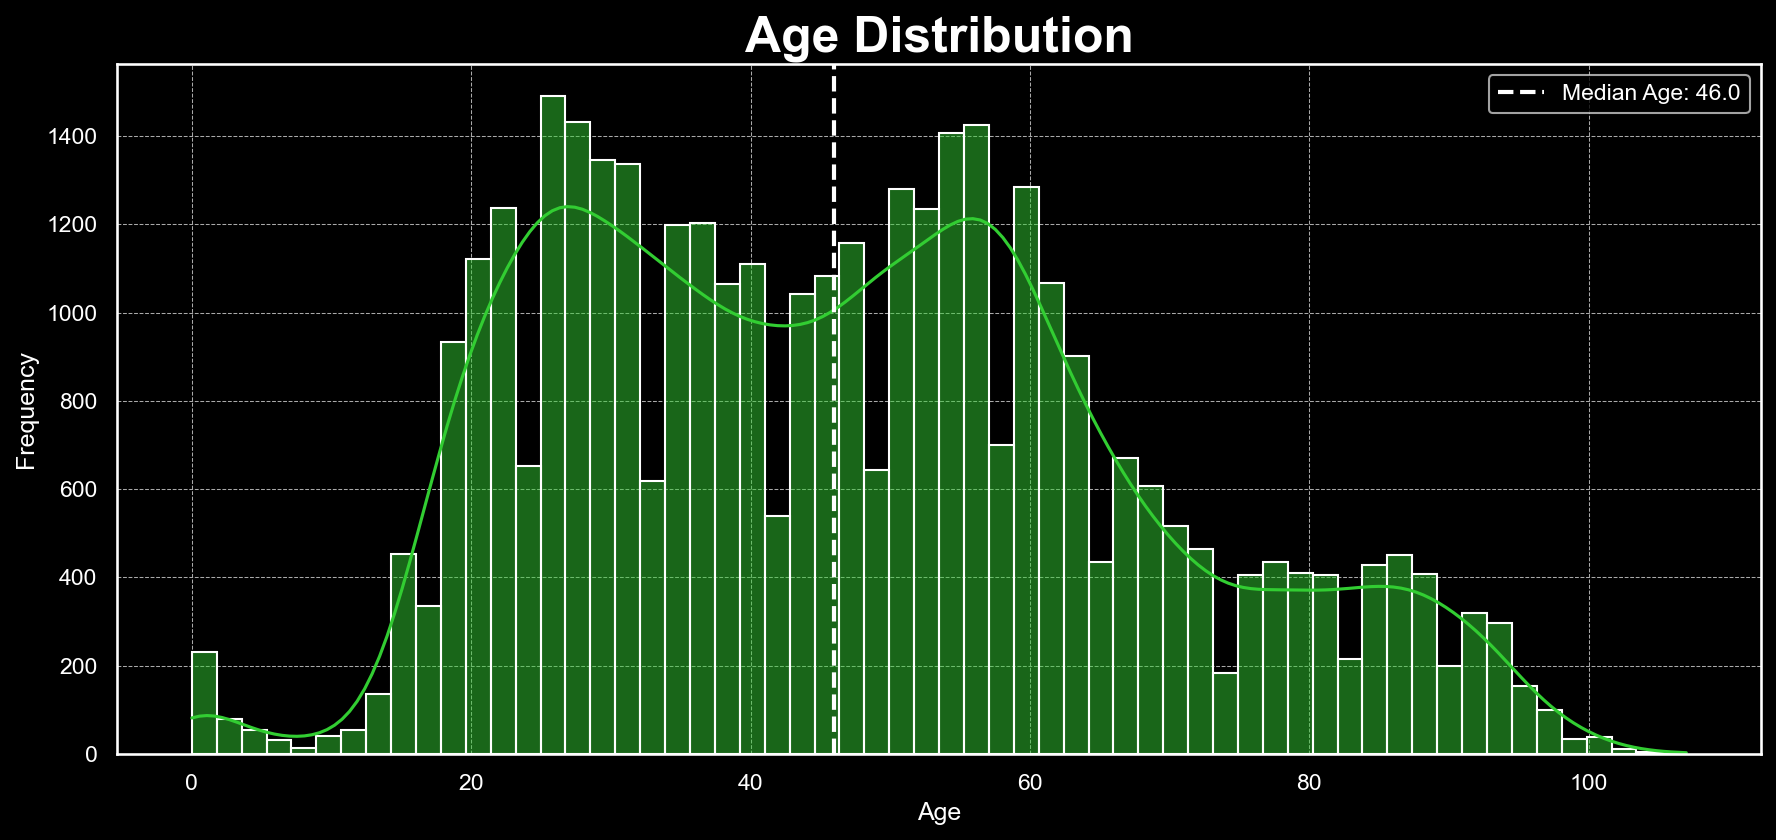

In [27]:
plt.figure(figsize=(12, 6), dpi=150, facecolor='black')
plt.title('Age Distribution', fontsize=24, fontweight='bold', color='white')
plot = sns.histplot(data=valid_age_df, x='age', bins='auto', kde=True, color='limegreen')

median_age = valid_age_df['age'].median()
plt.axvline(median_age, color='white', linestyle='--', label=f'Median Age: {median_age}', linewidth=2)

plt.xlabel('Age', fontsize=12, color='white')
plt.ylabel('Frequency', fontsize=12, color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(color='darkgray', linestyle='--', linewidth=0.5)

plt.gca().set_facecolor('black')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

legend = plt.legend()
for text in legend.get_texts():
    text.set_color('white')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

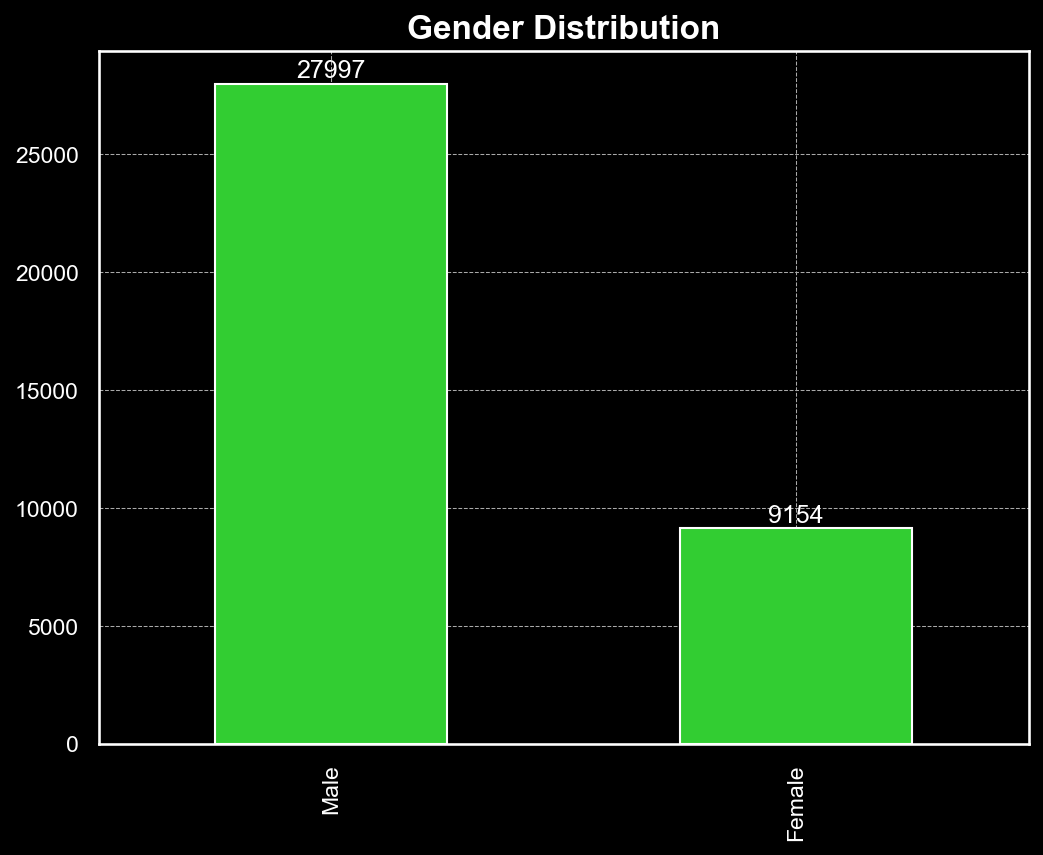

In [30]:
plt.figure(figsize=(8, 6), dpi=150, facecolor='black')
plt.title('Gender Distribution', fontsize=16, fontweight='bold', color='white')

# Replace 0 and 1 with 'Male' and 'Female'
gender_mapping = {0: 'Male', 1: 'Female'}
df['gender'] = df['gender'].map(gender_mapping)

plot = df['gender'].value_counts().plot(kind='bar', color='limegreen')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.grid(color='darkgray', linestyle='--', linewidth=0.5)

plt.gca().set_facecolor('black')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

for i, v in enumerate(df['gender'].value_counts()):
    plt.text(i, v + 50, str(v), color='white', ha='center', va='bottom', fontsize=12)

plt.show()

In [37]:
male_count = (df['gender'] == 0).sum()
female_count = (df['gender'] == 1).sum()

# Calculate the percentages
total_count = len(df)
percent_male = (male_count / total_count) * 100
percent_female = (female_count / total_count) * 100

print(f"Percentage of males: {percent_male:.2f}%")
print(f"Percentage of females: {percent_female:.2f}%")

Percentage of males: 0.00%
Percentage of females: 0.00%


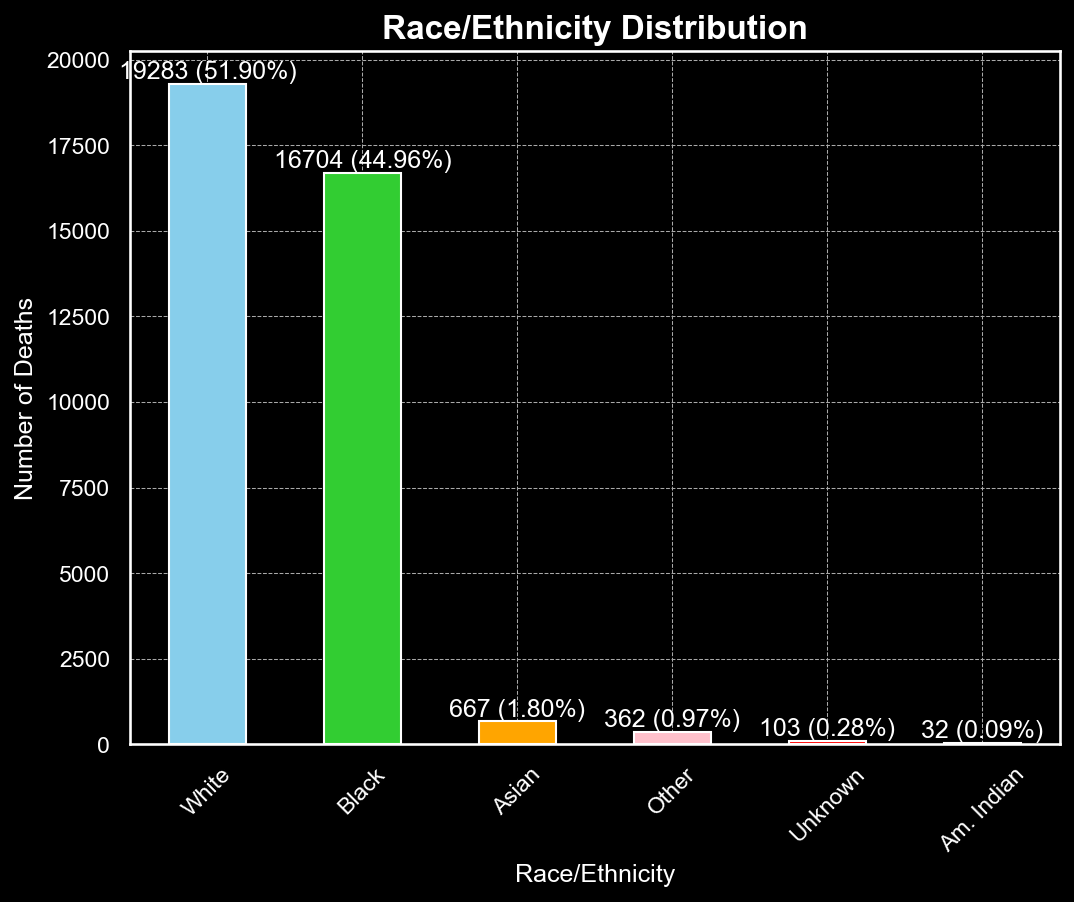

In [39]:

race_counts = df['race'].value_counts()

# Calculate the percentage of deaths within different racial or ethnic groups
total_deaths = len(df)
percentage_deaths = (race_counts / total_deaths) * 100

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6), dpi=150, facecolor='black')
plt.title('Race/Ethnicity Distribution', fontsize=16, fontweight='bold', color='white')
bar_colors = ['skyblue', 'limegreen', 'orange', 'pink', 'red']

race_counts.plot(kind='bar', color=bar_colors)
plt.xlabel('Race/Ethnicity', color='white')
plt.ylabel('Number of Deaths', color='white')
plt.xticks(rotation=45, color='white')

# Display the percentage of deaths on top of the bars
for i, count in enumerate(race_counts):
    plt.text(i, count + 10, f'{count} ({percentage_deaths[i]:.2f}%)', color='white', ha='center', va='bottom', fontsize=12)

plt.gca().set_facecolor('black')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

plt.grid(color='darkgray', linestyle='--', linewidth=0.5)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()

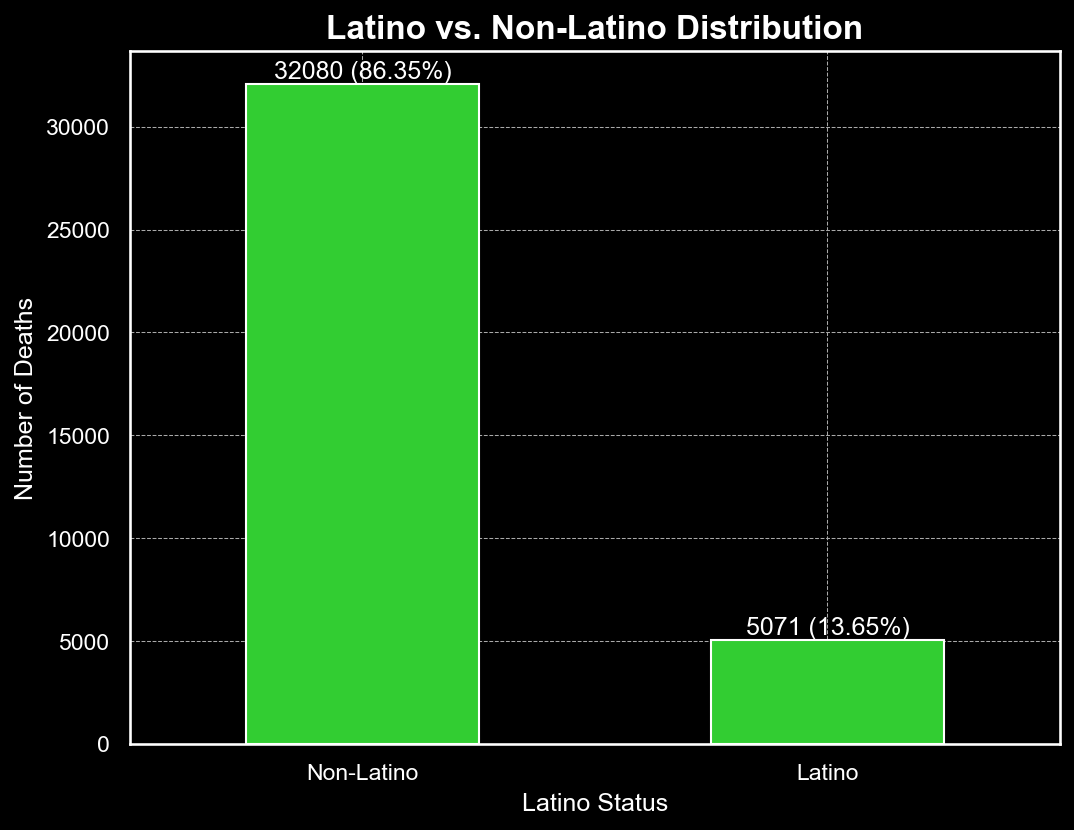

In [41]:
# Replace 0 with "Non-Latino" and 1 with "Latino"
df['latino'] = df['latino'].map({0: 'Non-Latino', 1: 'Latino'})

# Calculate the distribution of deaths by Latino status
# Calculate the percentage of deaths within Latino and Non-Latino groups
latino_counts = df['latino'].value_counts()
total_deaths = len(df)
percentage_deaths = (latino_counts / total_deaths) * 100

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6), dpi=150, facecolor='black')
plt.title('Latino vs. Non-Latino Distribution', fontsize=16, fontweight='bold', color='white')
bar_colors = ['limegreen', 'limegreen']

latino_counts.plot(kind='bar', color=bar_colors)
plt.xlabel('Latino Status', color='white')
plt.ylabel('Number of Deaths', color='white')
plt.xticks(rotation=0, color='white')

# Display the percentage of deaths on top of the bars
for i, count in enumerate(latino_counts):
    plt.text(i, count + 10, f'{count} ({percentage_deaths[i]:.2f}%)', color='white', ha='center', va='bottom', fontsize=12)

# Customize the background and grid
plt.gca().set_facecolor('black')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')

plt.grid(color='darkgray', linestyle='--', linewidth=0.5)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()

In [58]:
# Convert 'date_of_death' column to datetime format
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

# Extract year, month, and day of the week
df['year'] = df['date_of_death'].dt.year
df['month'] = df['date_of_death'].dt.month
df['day_of_week'] = df['date_of_death'].dt.dayofweek

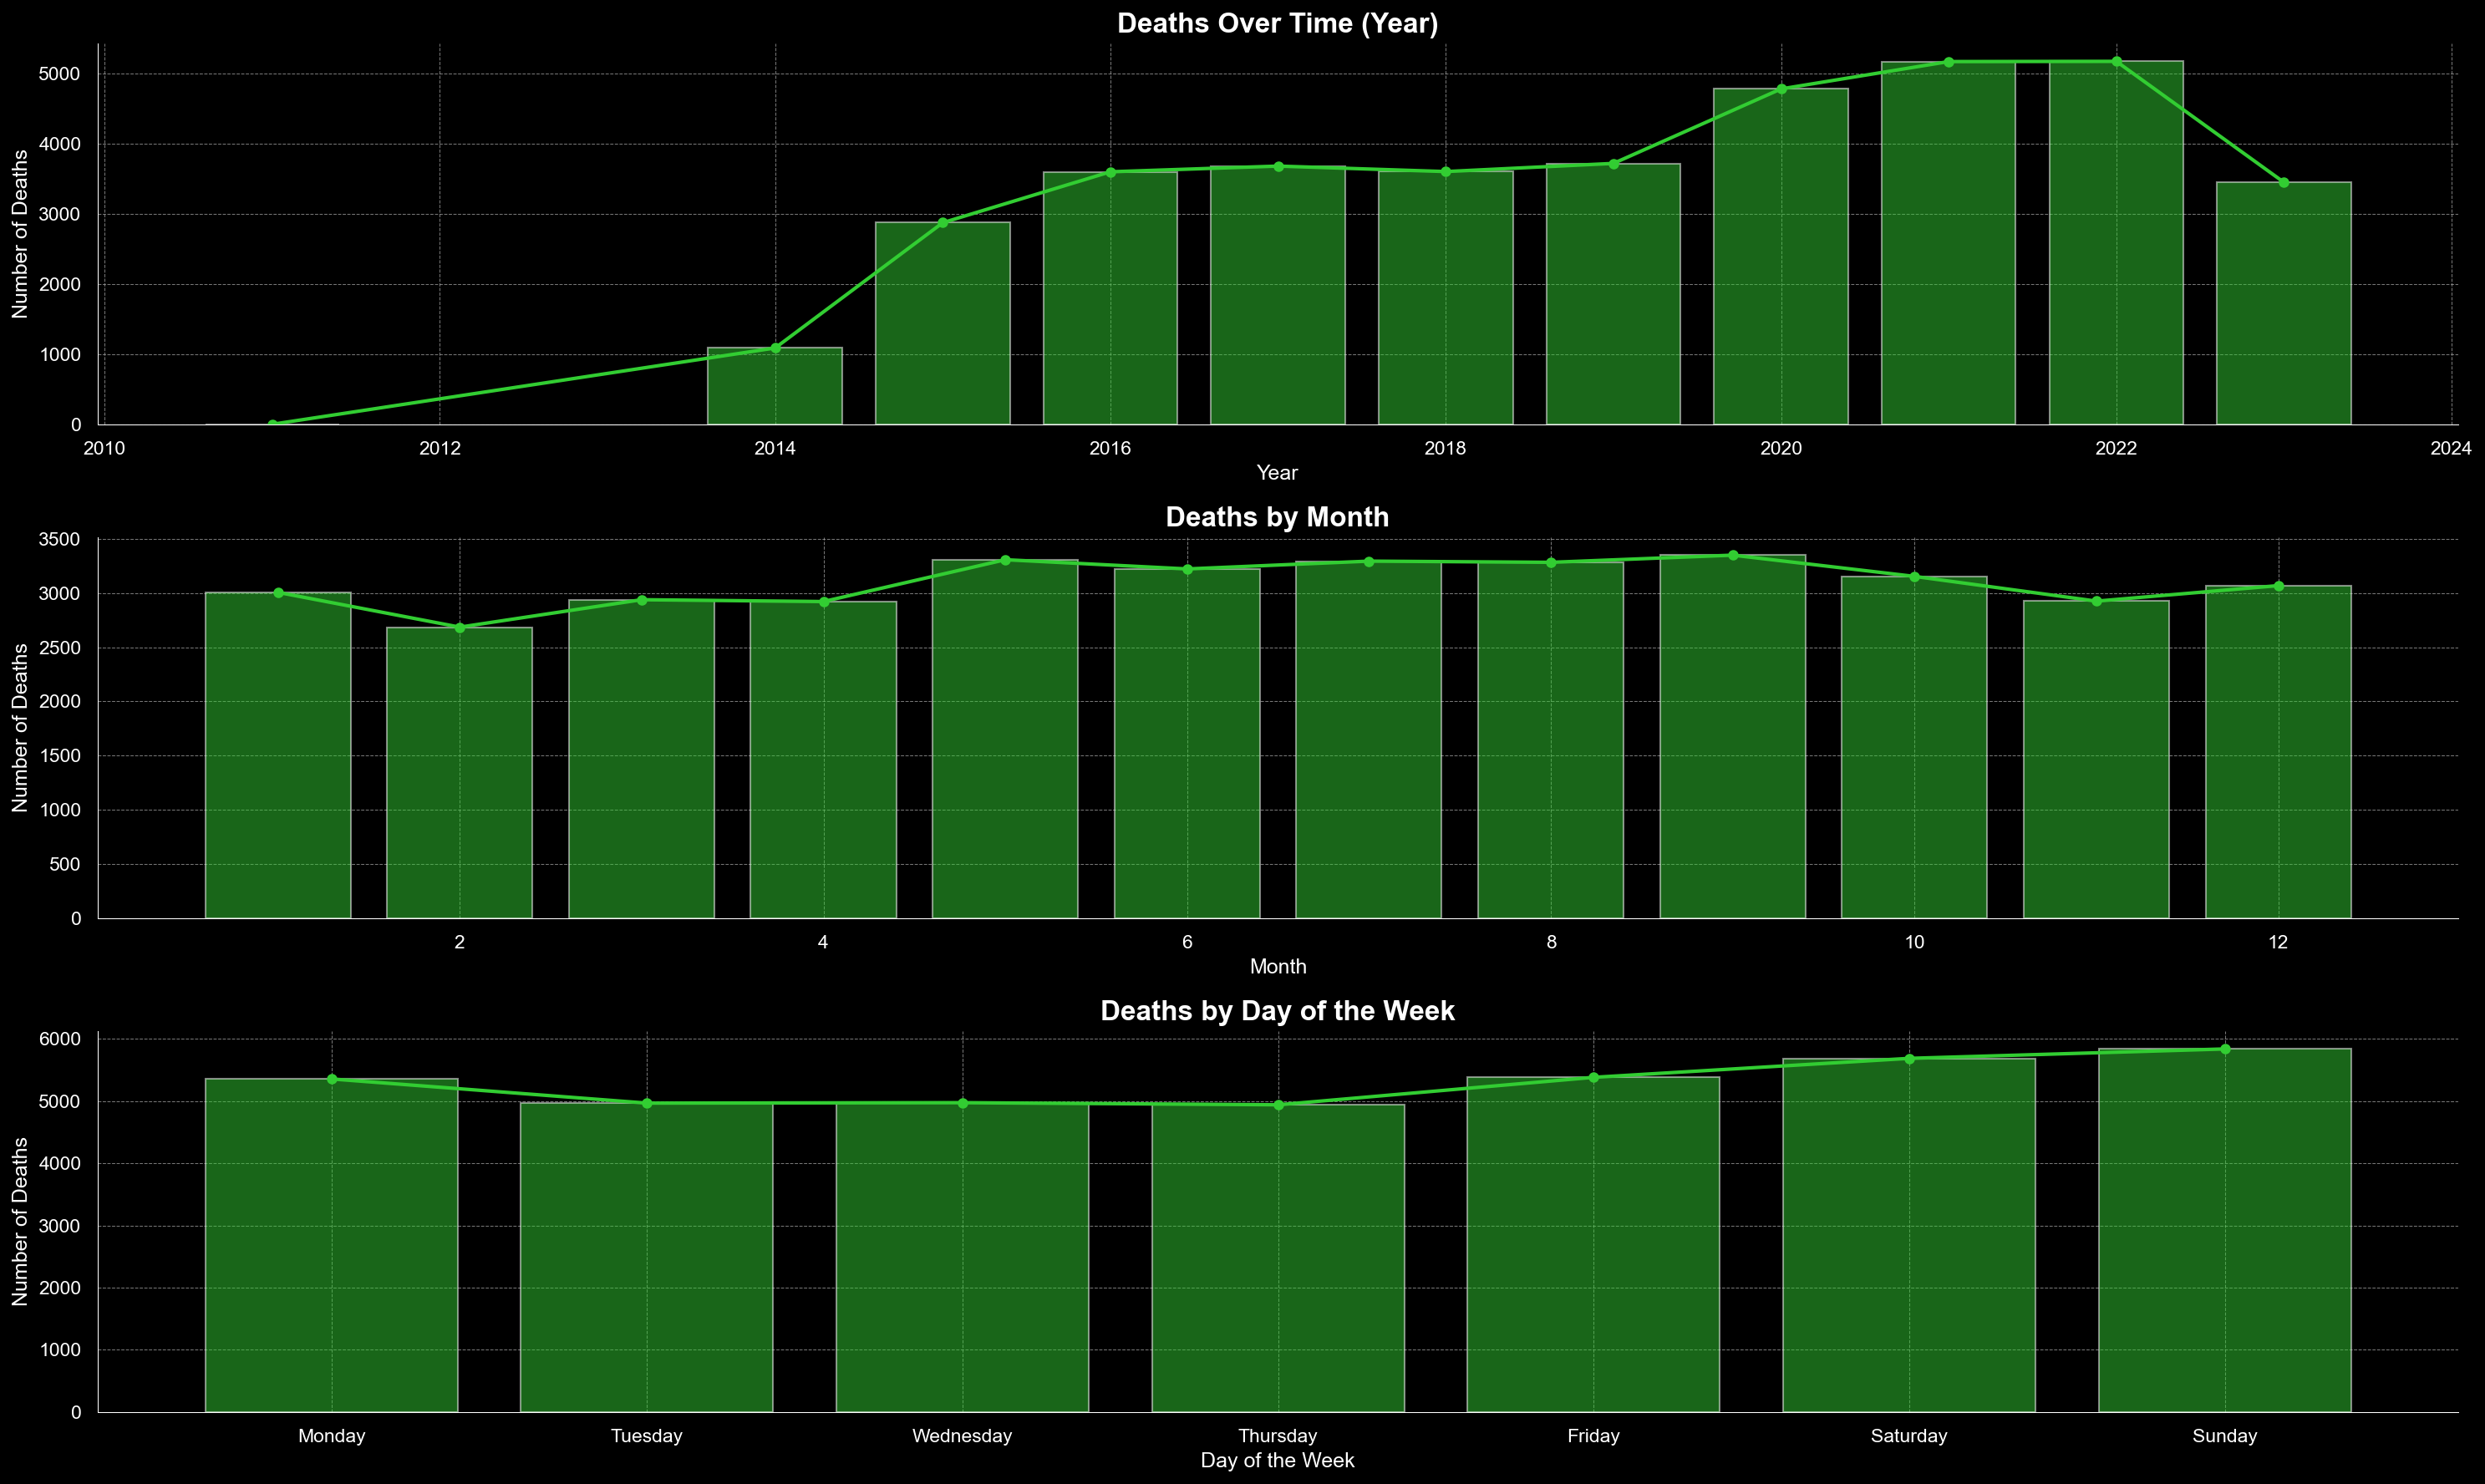

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), dpi=150, facecolor='black')

# Deaths over time (year) with bars and fading effect
ax = axes[0]
years = df['year'].value_counts().sort_index().index
deaths_per_year = df['year'].value_counts().sort_index().values
ax.bar(years, deaths_per_year, color='limegreen', alpha=0.5)  # Lighter lime green
df.groupby('year').size().plot(legend=False, ax=ax, color='limegreen', marker='o', linewidth=2, markersize=5)
ax.set_title('Deaths Over Time (Year)', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Year', color='white')
ax.set_ylabel('Number of Deaths', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Deaths by month with bars and fading effect
ax = axes[1]
months = df['month'].value_counts().sort_index().index
deaths_per_month = df['month'].value_counts().sort_index().values
ax.bar(months, deaths_per_month, color='limegreen', alpha=0.5)  # Lighter lime green
df.groupby('month').size().plot(legend=False, ax=ax, color='limegreen', marker='o', linewidth=2, markersize=5)
ax.set_title('Deaths by Month', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Month', color='white')
ax.set_ylabel('Number of Deaths', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Deaths by day of the week with bars and fading effect
ax = axes[2]
days = df['day_of_week'].value_counts().sort_index().index
deaths_per_day = df['day_of_week'].value_counts().sort_index().values
ax.bar(days, deaths_per_day, color='limegreen', alpha=0.5)  # Lighter lime green
df.groupby('day_of_week').size().plot(legend=False, ax=ax, color='limegreen', marker='o', linewidth=2, markersize=5)
ax.set_title('Deaths by Day of the Week', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Day of the Week', color='white')
ax.set_ylabel('Number of Deaths', color='white')
ax.set_xticks(range(7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the background color and customize grid style
for ax in axes:
    ax.set_facecolor('black')
    ax.spines['left'].set_color('white')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('white')
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(0)
    ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.7)  # Darker, less solid grid

# Show the plots
plt.tight_layout()
plt.show()

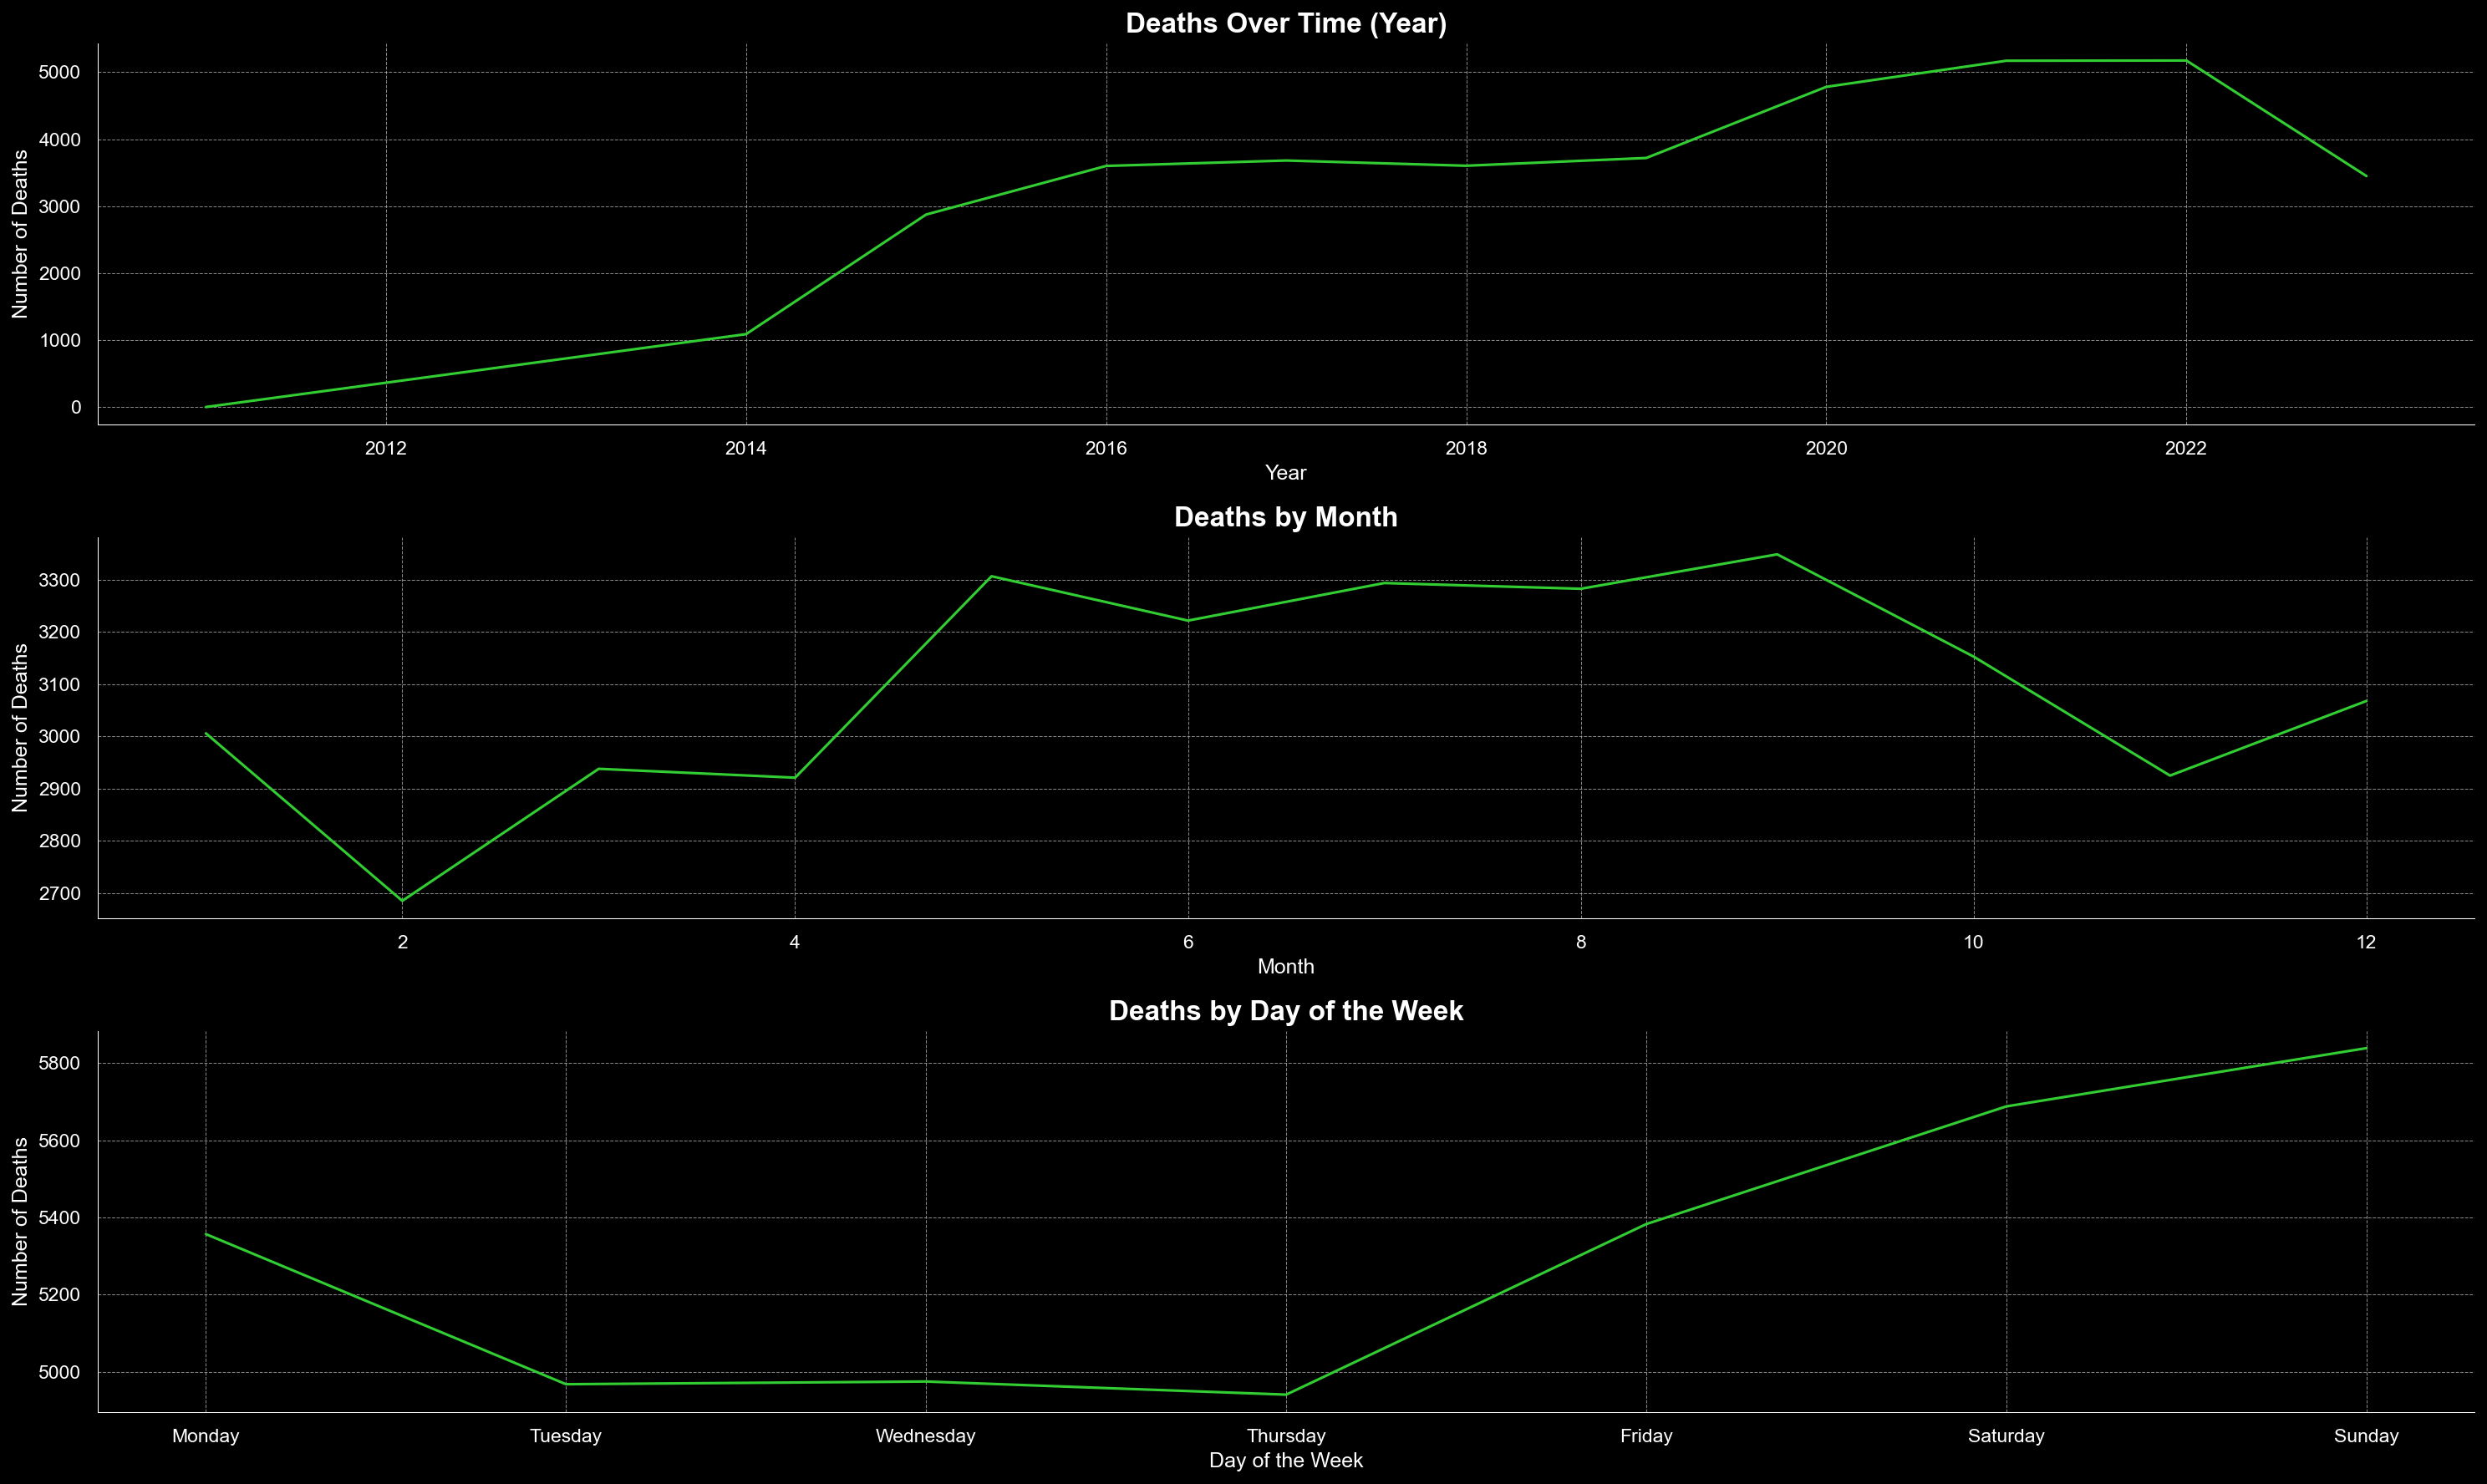

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), dpi=150, facecolor='black')

# Deaths over time (year)
ax = axes[0]
df['year'].value_counts().sort_index().plot(kind='line', color='limegreen', ax=ax)
ax.set_title('Deaths Over Time (Year)', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Year', color='white')
ax.set_ylabel('Number of Deaths', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Deaths by month
ax = axes[1]
df['month'].value_counts().sort_index().plot(kind='line', color='limegreen', ax=ax)
ax.set_title('Deaths by Month', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel ('Month', color='white')
ax.set_ylabel('Number of Deaths', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Deaths by day of the week
ax = axes[2]
df['day_of_week'].value_counts().sort_index().plot(kind='line', color='limegreen', ax=ax)
ax.set_title('Deaths by Day of the Week', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Day of the Week', color='white')
ax.set_ylabel('Number of Deaths', color='white')
ax.set_xticks(range(7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the background color
for ax in axes:
    ax.set_facecolor('black')
    ax.spines['left'].set_color('white')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('white')
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(0)

# Customize the grid style
for ax in axes:
    ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.8)  # Darker and less prominent grid

# Show the plots
plt.tight_layout()
plt.show()

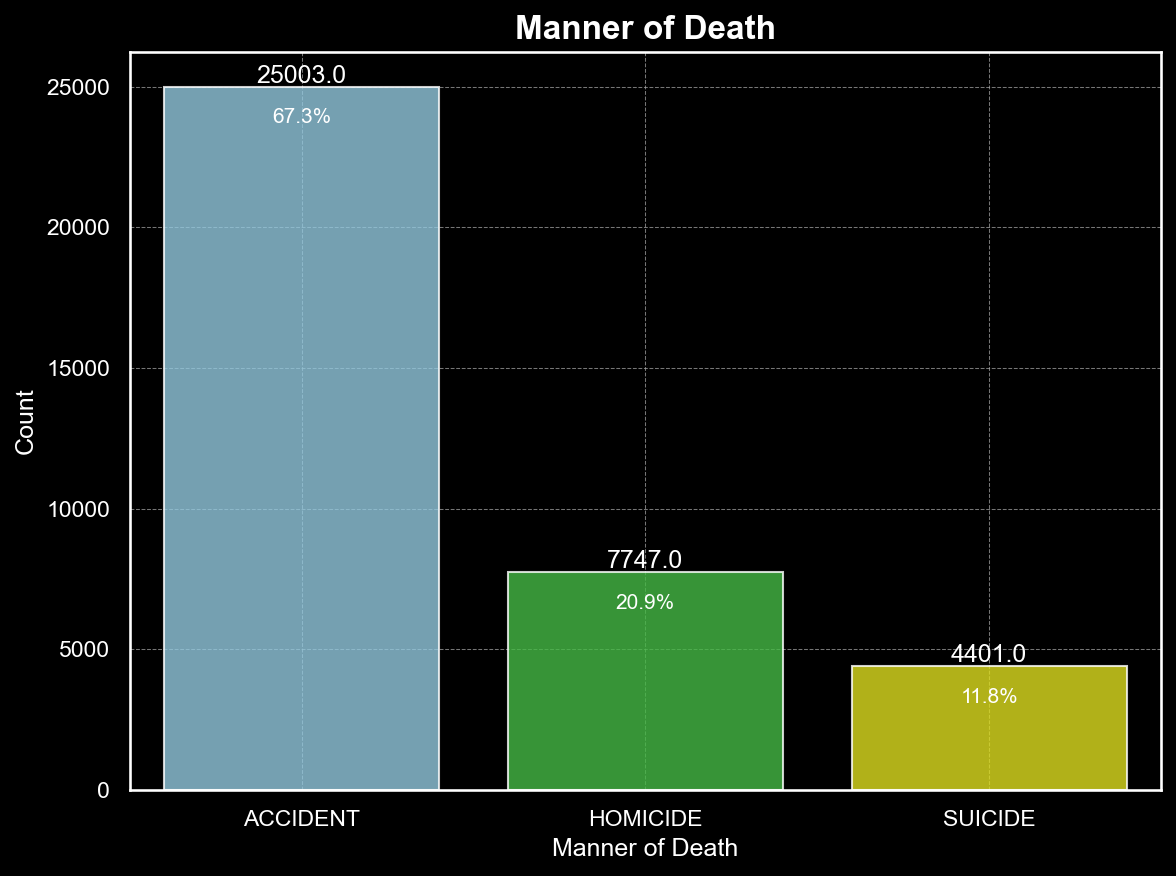

In [77]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=150, facecolor='black')

# Define custom colors
custom_colors = ["skyblue", "limegreen", "yellow"]

# Explore the different manners of death
sns.countplot(data=df, x='manner_of_death', palette=custom_colors, alpha=0.8, ax=ax)  # Set alpha for transparency

ax.set_title('Manner of Death', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Manner of Death', color='white')
ax.set_ylabel('Count', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')

# Customize the grid style
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.7)  

# Add numbers and percentages on each bar
total_count = len(df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                color='white', fontsize=12, xytext=(0, 5), textcoords='offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                color='white', fontsize=10, xytext=(0, -15), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

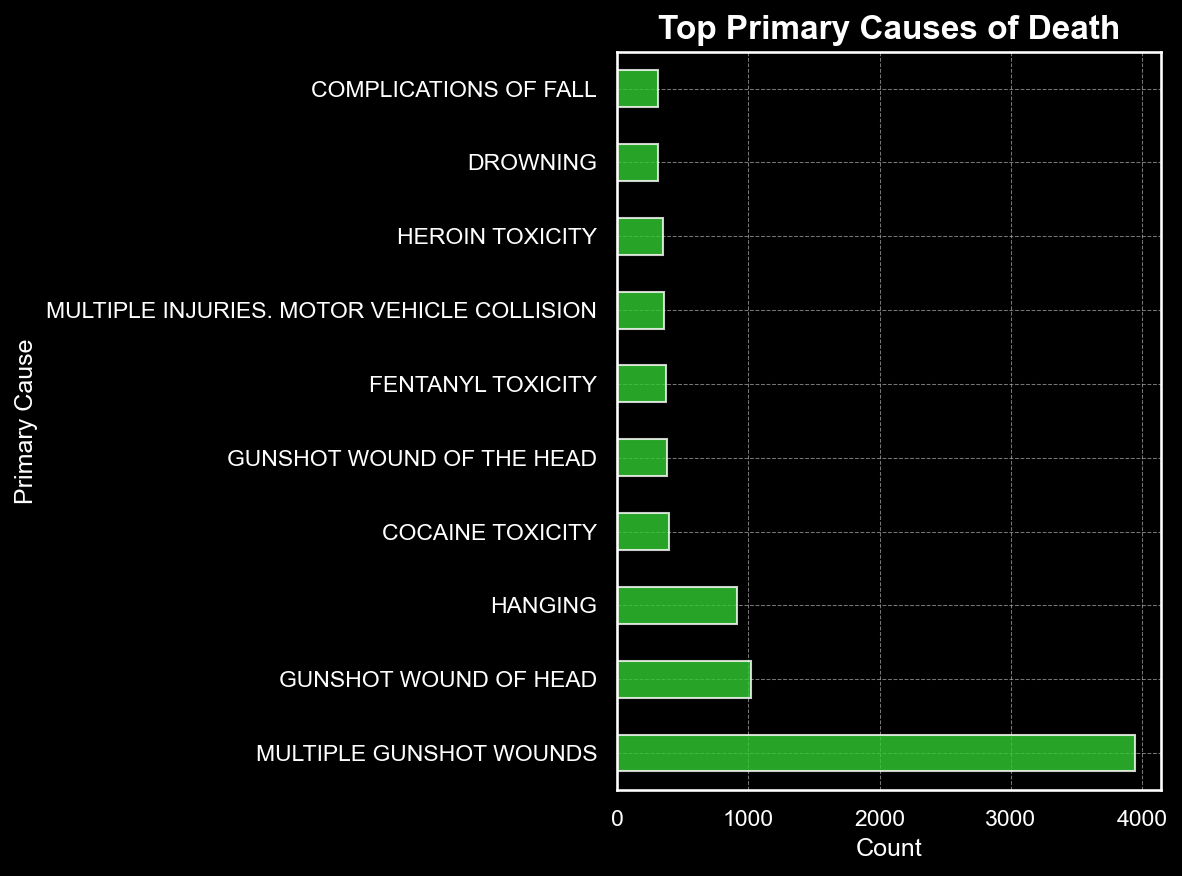

In [78]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=150, facecolor='black')

# Analyze primary causes of death
top_primary_causes = df['primary_cause'].value_counts().head(10)
top_primary_causes.plot(kind='barh', color='limegreen',alpha=0.8, ax=ax) 

ax.set_title('Top Primary Causes of Death', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Count', color='white')
ax.set_ylabel('Primary Cause', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')

ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [85]:
df['primary_cause'] = df['primary_cause'].replace({
    'GUNSHOT WOUND OF HEAD': 'GUNSHOT WOUND',
    'GUNSHOT WOUND OF THE HEAD': 'GUNSHOT WOUND',
    'MULTIPLE GUNSHOT WOUNDS': 'GUNSHOT WOUND'
})

/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_1368/3486211427.py:19: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



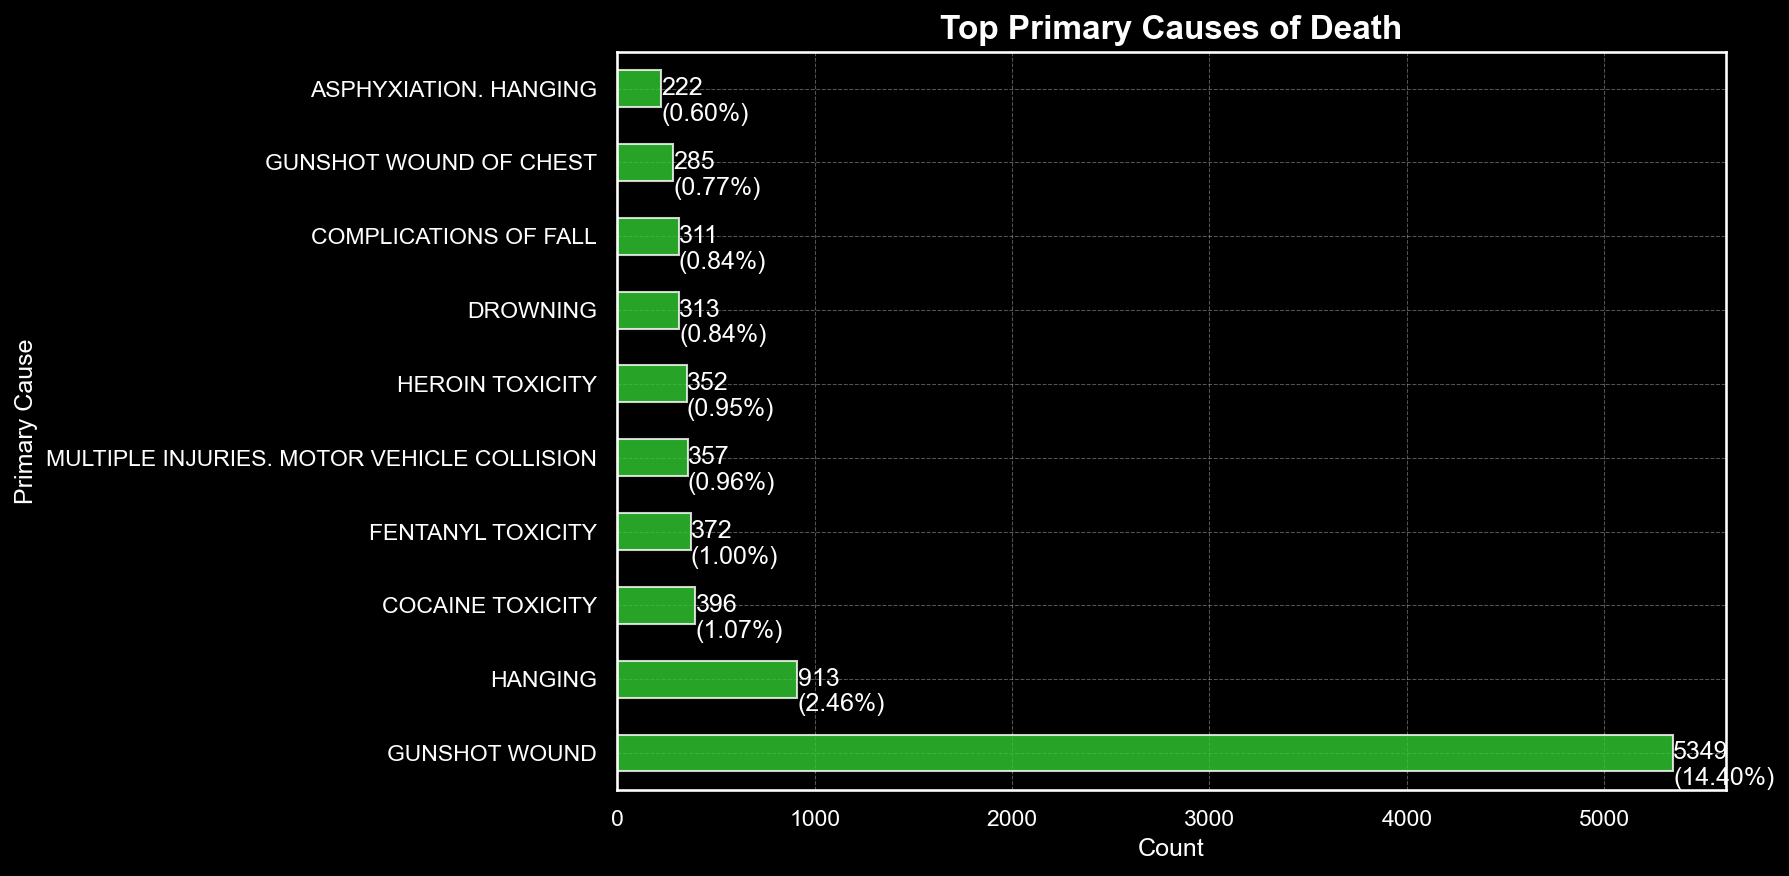

In [97]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=150, facecolor='black')


top_primary_causes = df['primary_cause'].value_counts().head(10)
top_primary_causes.plot(kind='barh', color='limegreen', alpha=0.8, ax=ax)

ax.set_title('Top Primary Causes of Death', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Count', color='white')
ax.set_ylabel('Primary Cause', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')


ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add numbers and percentages as separate bars
for i, (cause, count) in enumerate(top_primary_causes.iteritems()):
    percent = count / len(df) * 100
    ax.text(count + 1, i, f'{count}', color='white', va='center', fontsize=12)
    ax.text(count + 1, i - 0.35, f'({percent:.2f}%)', color='white', va='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

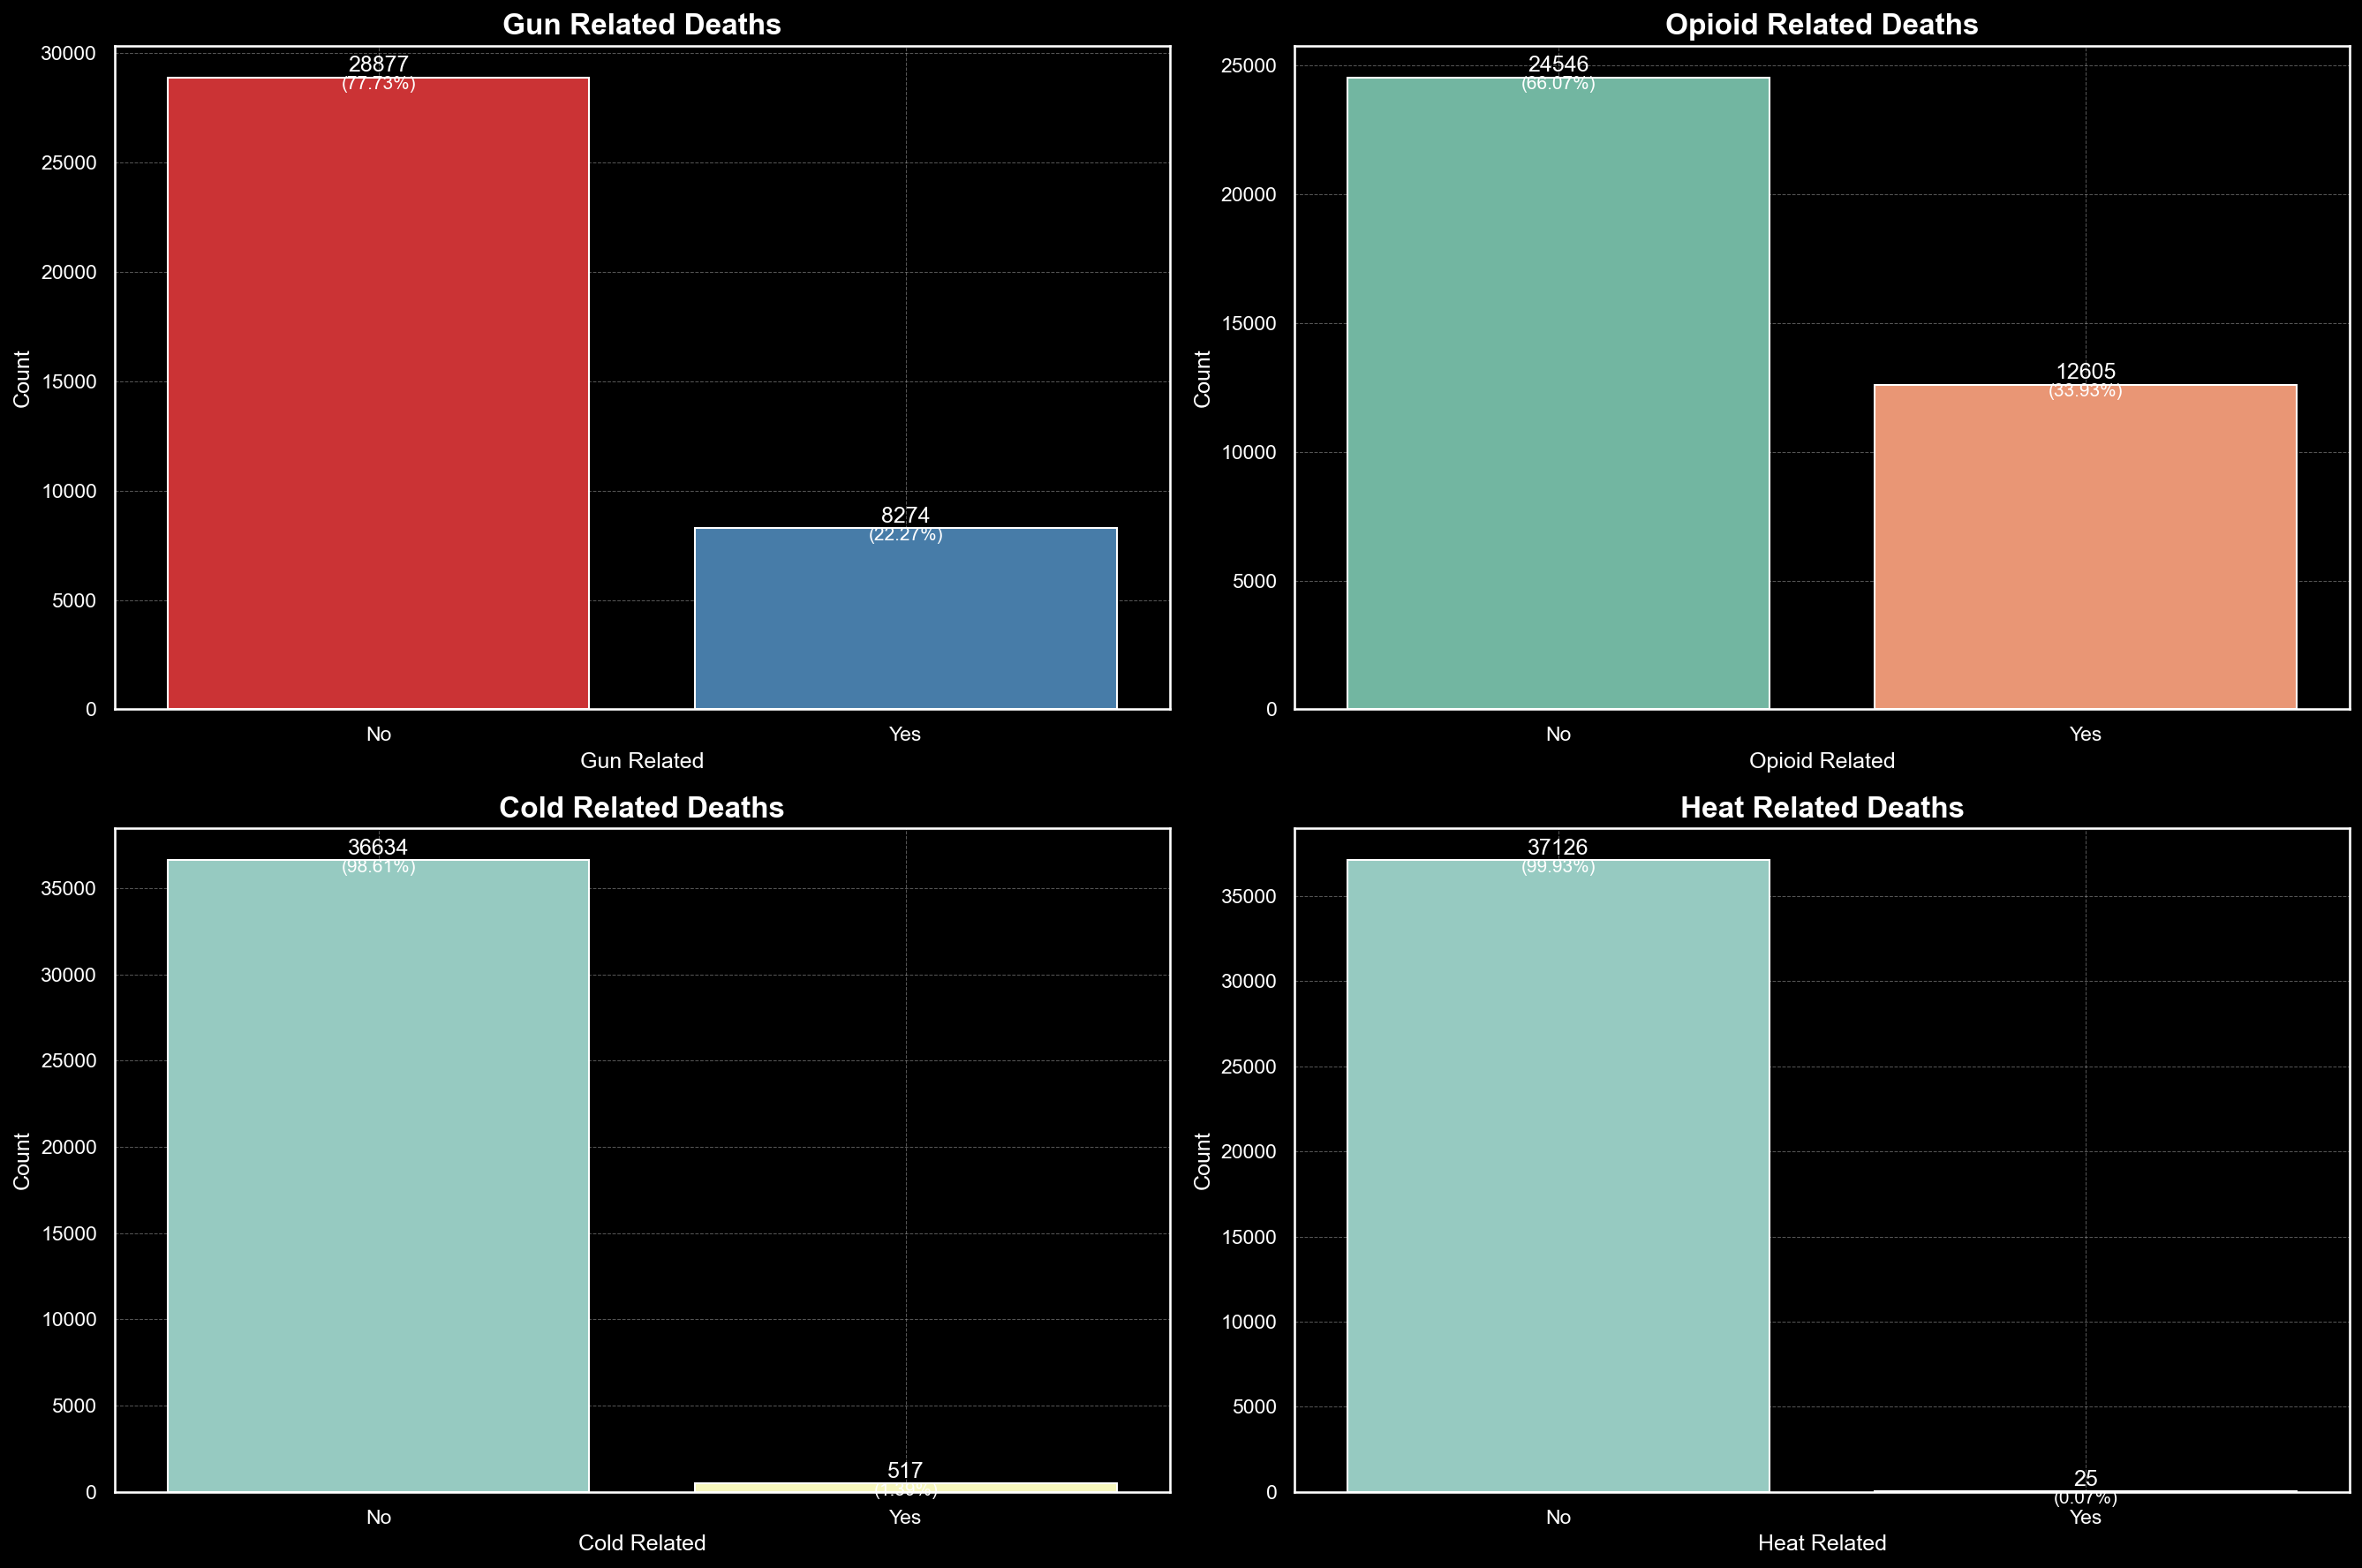

In [102]:
# Replace 0 and 1 with 'No' and 'Yes' for the related attributes
df['gun_related'] = df['gun_related'].replace({0: 'No', 1: 'Yes'})
df['opioid_related'] = df['opioid_related'].replace({0: 'No', 1: 'Yes'})
df['cold_related'] = df['cold_related'].replace({0: 'No', 1: 'Yes'})
df['heat_related'] = df['heat_related'].replace({0: 'No', 1: 'Yes'})


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), dpi=150, facecolor='black')

# Analyze "gun_related" attribute
ax = axes[0, 0]
sns.countplot(data=df, x='gun_related', palette='Set1', ax=ax)
ax.set_title('Gun Related Deaths', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Gun Related', color='white')
ax.set_ylabel('Count', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add numbers and percentages on each bar for "gun_related" attribute
for i, count in enumerate(df['gun_related'].value_counts()):
    percent = count / len(df) * 100
    ax.text(i, count + 50, f'{count}', color='white', ha='center', va='bottom', fontsize=12)
    ax.text(i, count + 50, f'({percent:.2f}%)', color='white', ha='center', va='top', fontsize=10)

# Analyze "opioid_related" attribute
ax = axes[0, 1]
sns.countplot(data=df, x='opioid_related', palette='Set2', ax=ax)
ax.set_title('Opioid Related Deaths', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Opioid Related', color='white')
ax.set_ylabel('Count', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add numbers and percentages on each bar for "opioid_related" attribute
for i, count in enumerate(df['opioid_related'].value_counts()):
    percent = count / len(df) * 100
    ax.text(i, count + 50, f'{count}', color='white', ha='center', va='bottom', fontsize=12)
    ax.text(i, count + 50, f'({percent:.2f}%)', color='white', ha='center', va='top', fontsize=10)

# Analyze "cold_related" attribute
ax = axes[1, 0]
sns.countplot(data=df, x='cold_related', palette='Set3', ax=ax)
ax.set_title('Cold Related Deaths', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Cold Related', color='white')
ax.set_ylabel('Count', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add numbers and percentages on each bar for "cold_related" attribute
for i, count in enumerate(df['cold_related'].value_counts()):
    percent = count / len(df) * 100
    ax.text(i, count + 50, f'{count}', color='white', ha='center', va='bottom', fontsize=12)
    ax.text(i, count + 50, f'({percent:.2f}%)', color='white', ha='center', va='top', fontsize=10)

# Analyze "heat_related" attribute
ax = axes[1, 1]
sns.countplot(data=df, x='heat_related', palette='Set3', ax=ax)
ax.set_title('Heat Related Deaths', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Heat Related', color='white')
ax.set_ylabel('Count', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add numbers and percentages on each bar for "heat_related" attribute
for i, count in enumerate(df['heat_related'].value_counts()):
    percent = count / len(df) * 100
    ax.text(i, count + 50, f'{count}', color='white', ha='center', va='bottom', fontsize=12)
    ax.text(i, count + 50, f'({percent:.2f}%)', color='white', ha='center', va='top', fontsize=10)

# Show the plots
plt.tight_layout()
plt.show()

In [131]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

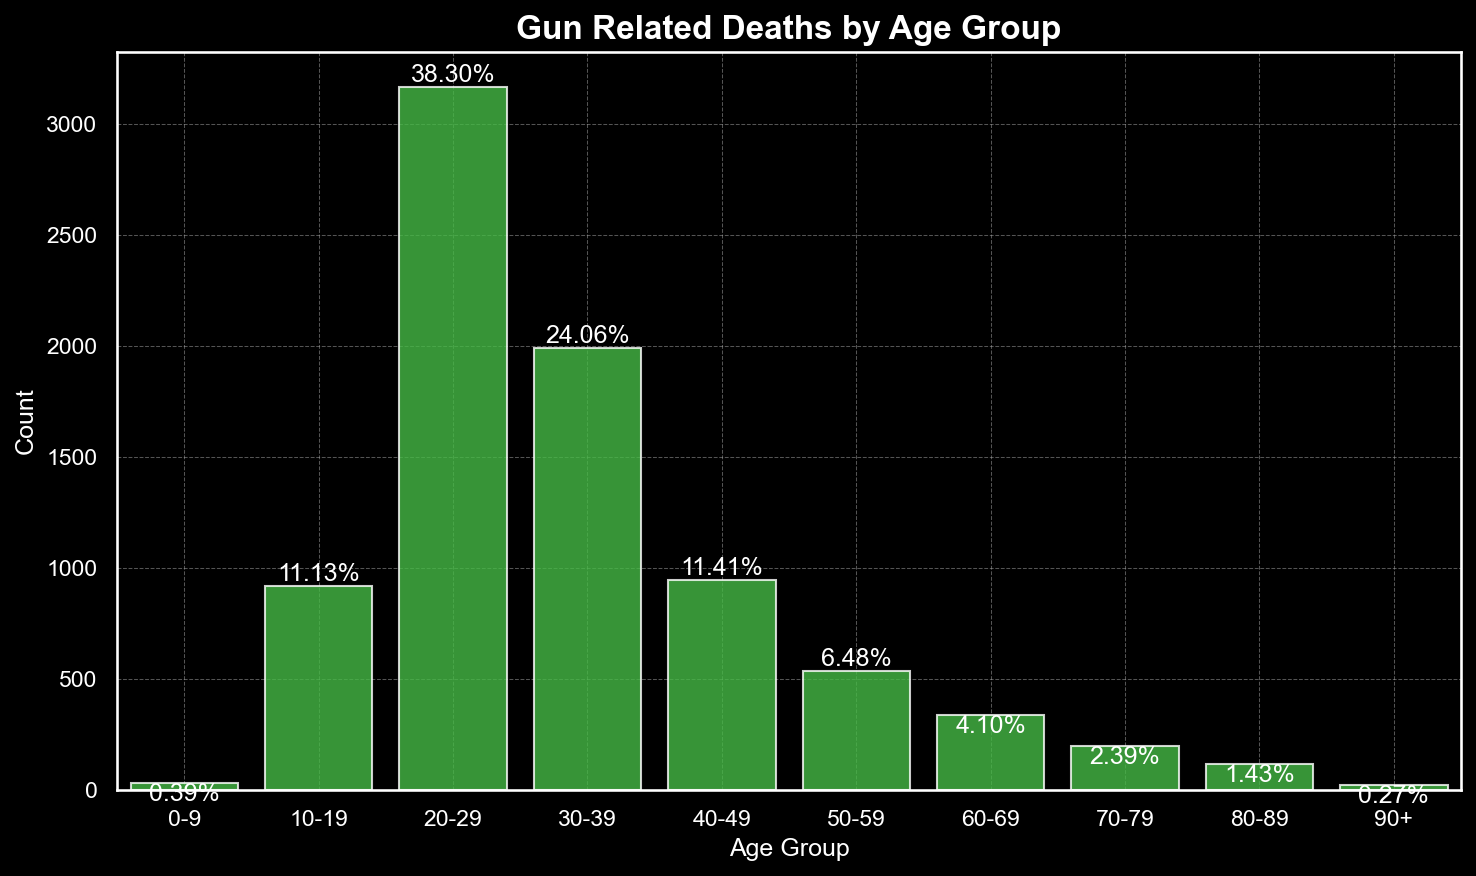

In [130]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150, facecolor='black')
gun_related_deaths = df[df['gun_related'] == 'Yes']

# Create a bar plot
ax = sns.countplot(data=gun_related_deaths, x='age_group', color='limegreen', alpha=0.8)
ax.set_title('Gun Related Deaths by Age Group', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Age Group', color='white')
ax.set_ylabel('Count', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

total_deaths = len(gun_related_deaths)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_deaths * 100
    va = 'bottom'
    if percentage < 5:
        va = 'top'
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va=va, color='white', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


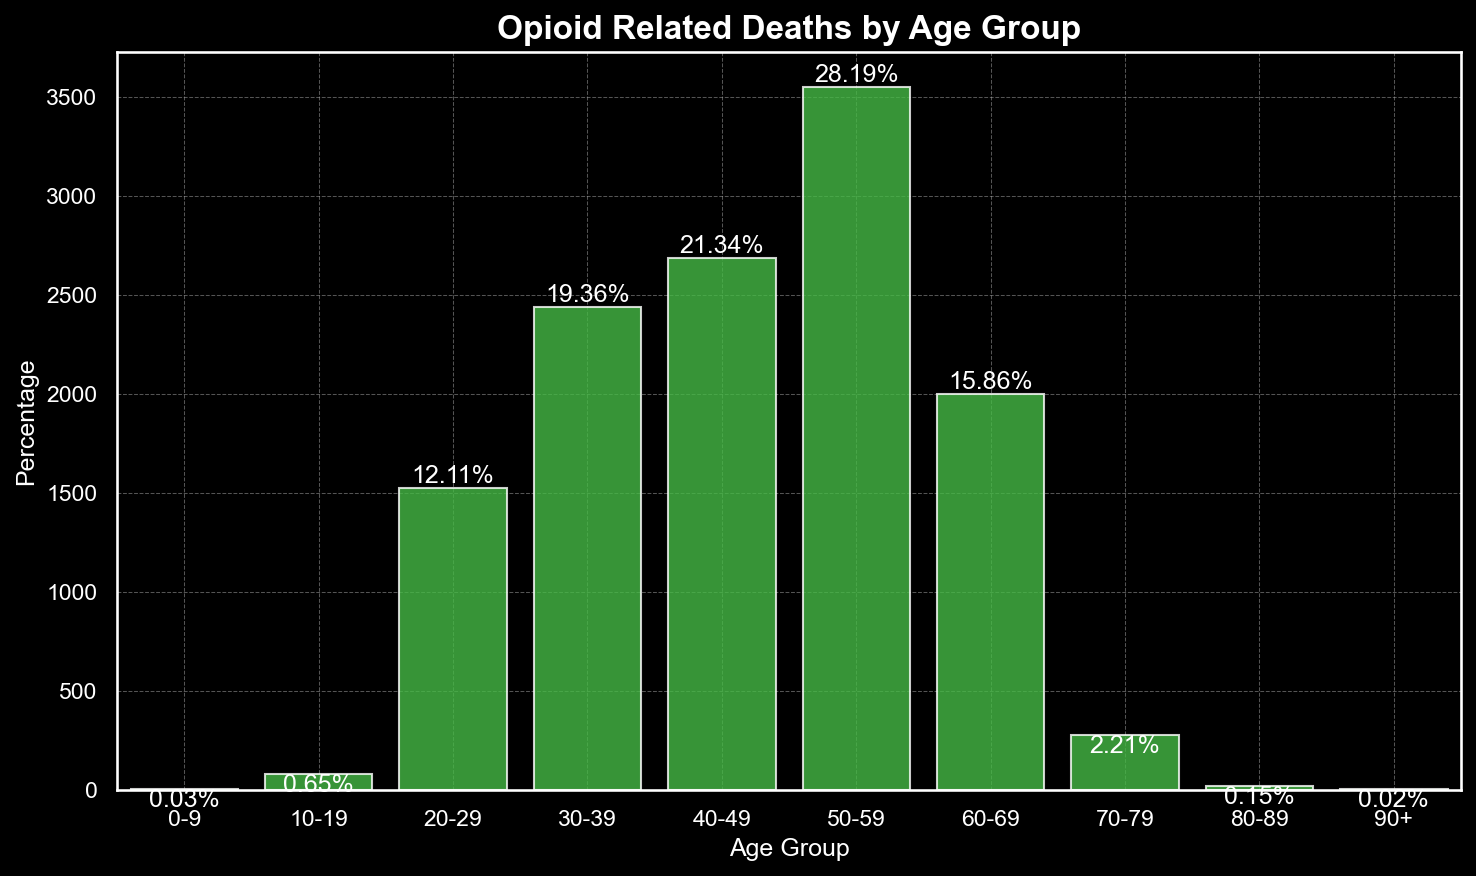

In [133]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150, facecolor='black')
opioid_related_deaths = df[df['opioid_related'] == 'Yes']

# Create a bar plot
ax = sns.countplot(data=opioid_related_deaths, x='age_group', color='limegreen', alpha=0.8)
ax.set_title('Opioid Related Deaths by Age Group', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Age Group', color='white')
ax.set_ylabel('Percentage', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add percentages only on each bar
total_deaths = len(opioid_related_deaths)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_deaths * 100
    va = 'bottom'
    if percentage < 5:
        va = 'top' 
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va=va, color='white', fontsize=12)

plt.tight_layout()
plt.show()

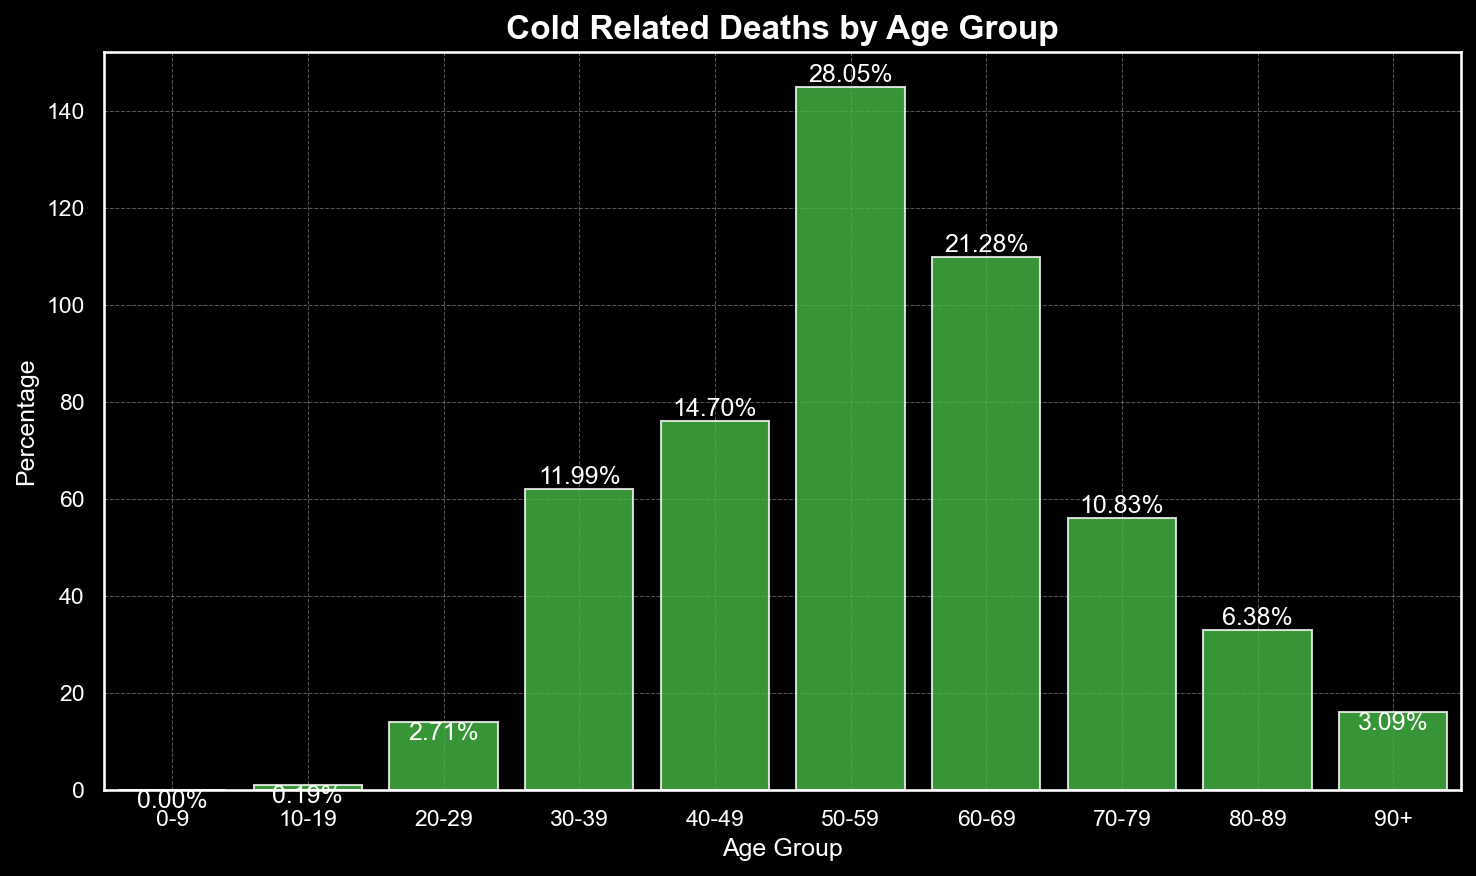

In [143]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150, facecolor='black')

# Filter the dataset for cold-related deaths
cold_related_deaths = df[df['cold_related'] == 'Yes']

# Create a bar plot
ax = sns.countplot(data=cold_related_deaths, x='age_group', color='limegreen', alpha=0.8)
ax.set_title('Cold Related Deaths by Age Group', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Age Group', color='white')
ax.set_ylabel('Percentage', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add percentages only on each bar
total_deaths = len(cold_related_deaths)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_deaths * 100
    va = 'bottom'
    if percentage < 5:
        va = 'top' 
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va=va, color='white', fontsize=12)

plt.tight_layout()
plt.show()

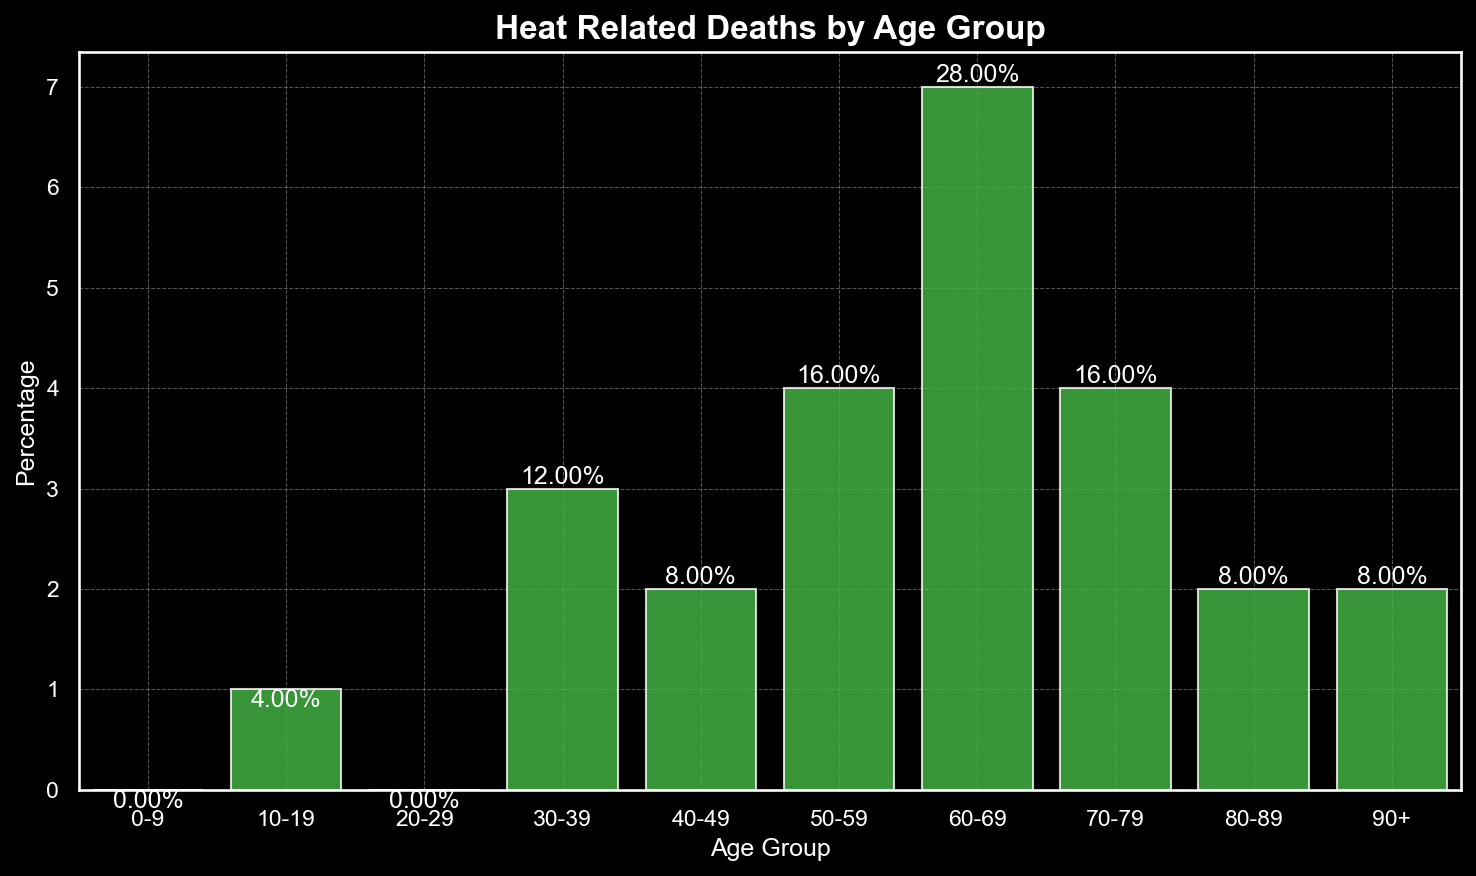

In [144]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150, facecolor='black')

# Filter the dataset for heat-related deaths
heat_related_deaths = df[df['heat_related'] == 'Yes']

# Create a bar plot
ax = sns.countplot(data=heat_related_deaths, x='age_group', color='limegreen', alpha=0.8)
ax.set_title('Heat Related Deaths by Age Group', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Age Group', color='white')
ax.set_ylabel('Percentage', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Add percentages only on each bar
total_deaths = len(heat_related_deaths)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_deaths * 100
    va = 'bottom'
    if percentage < 5:
        va = 'top'
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va=va, color='white', fontsize=12)

plt.tight_layout()
plt.show()

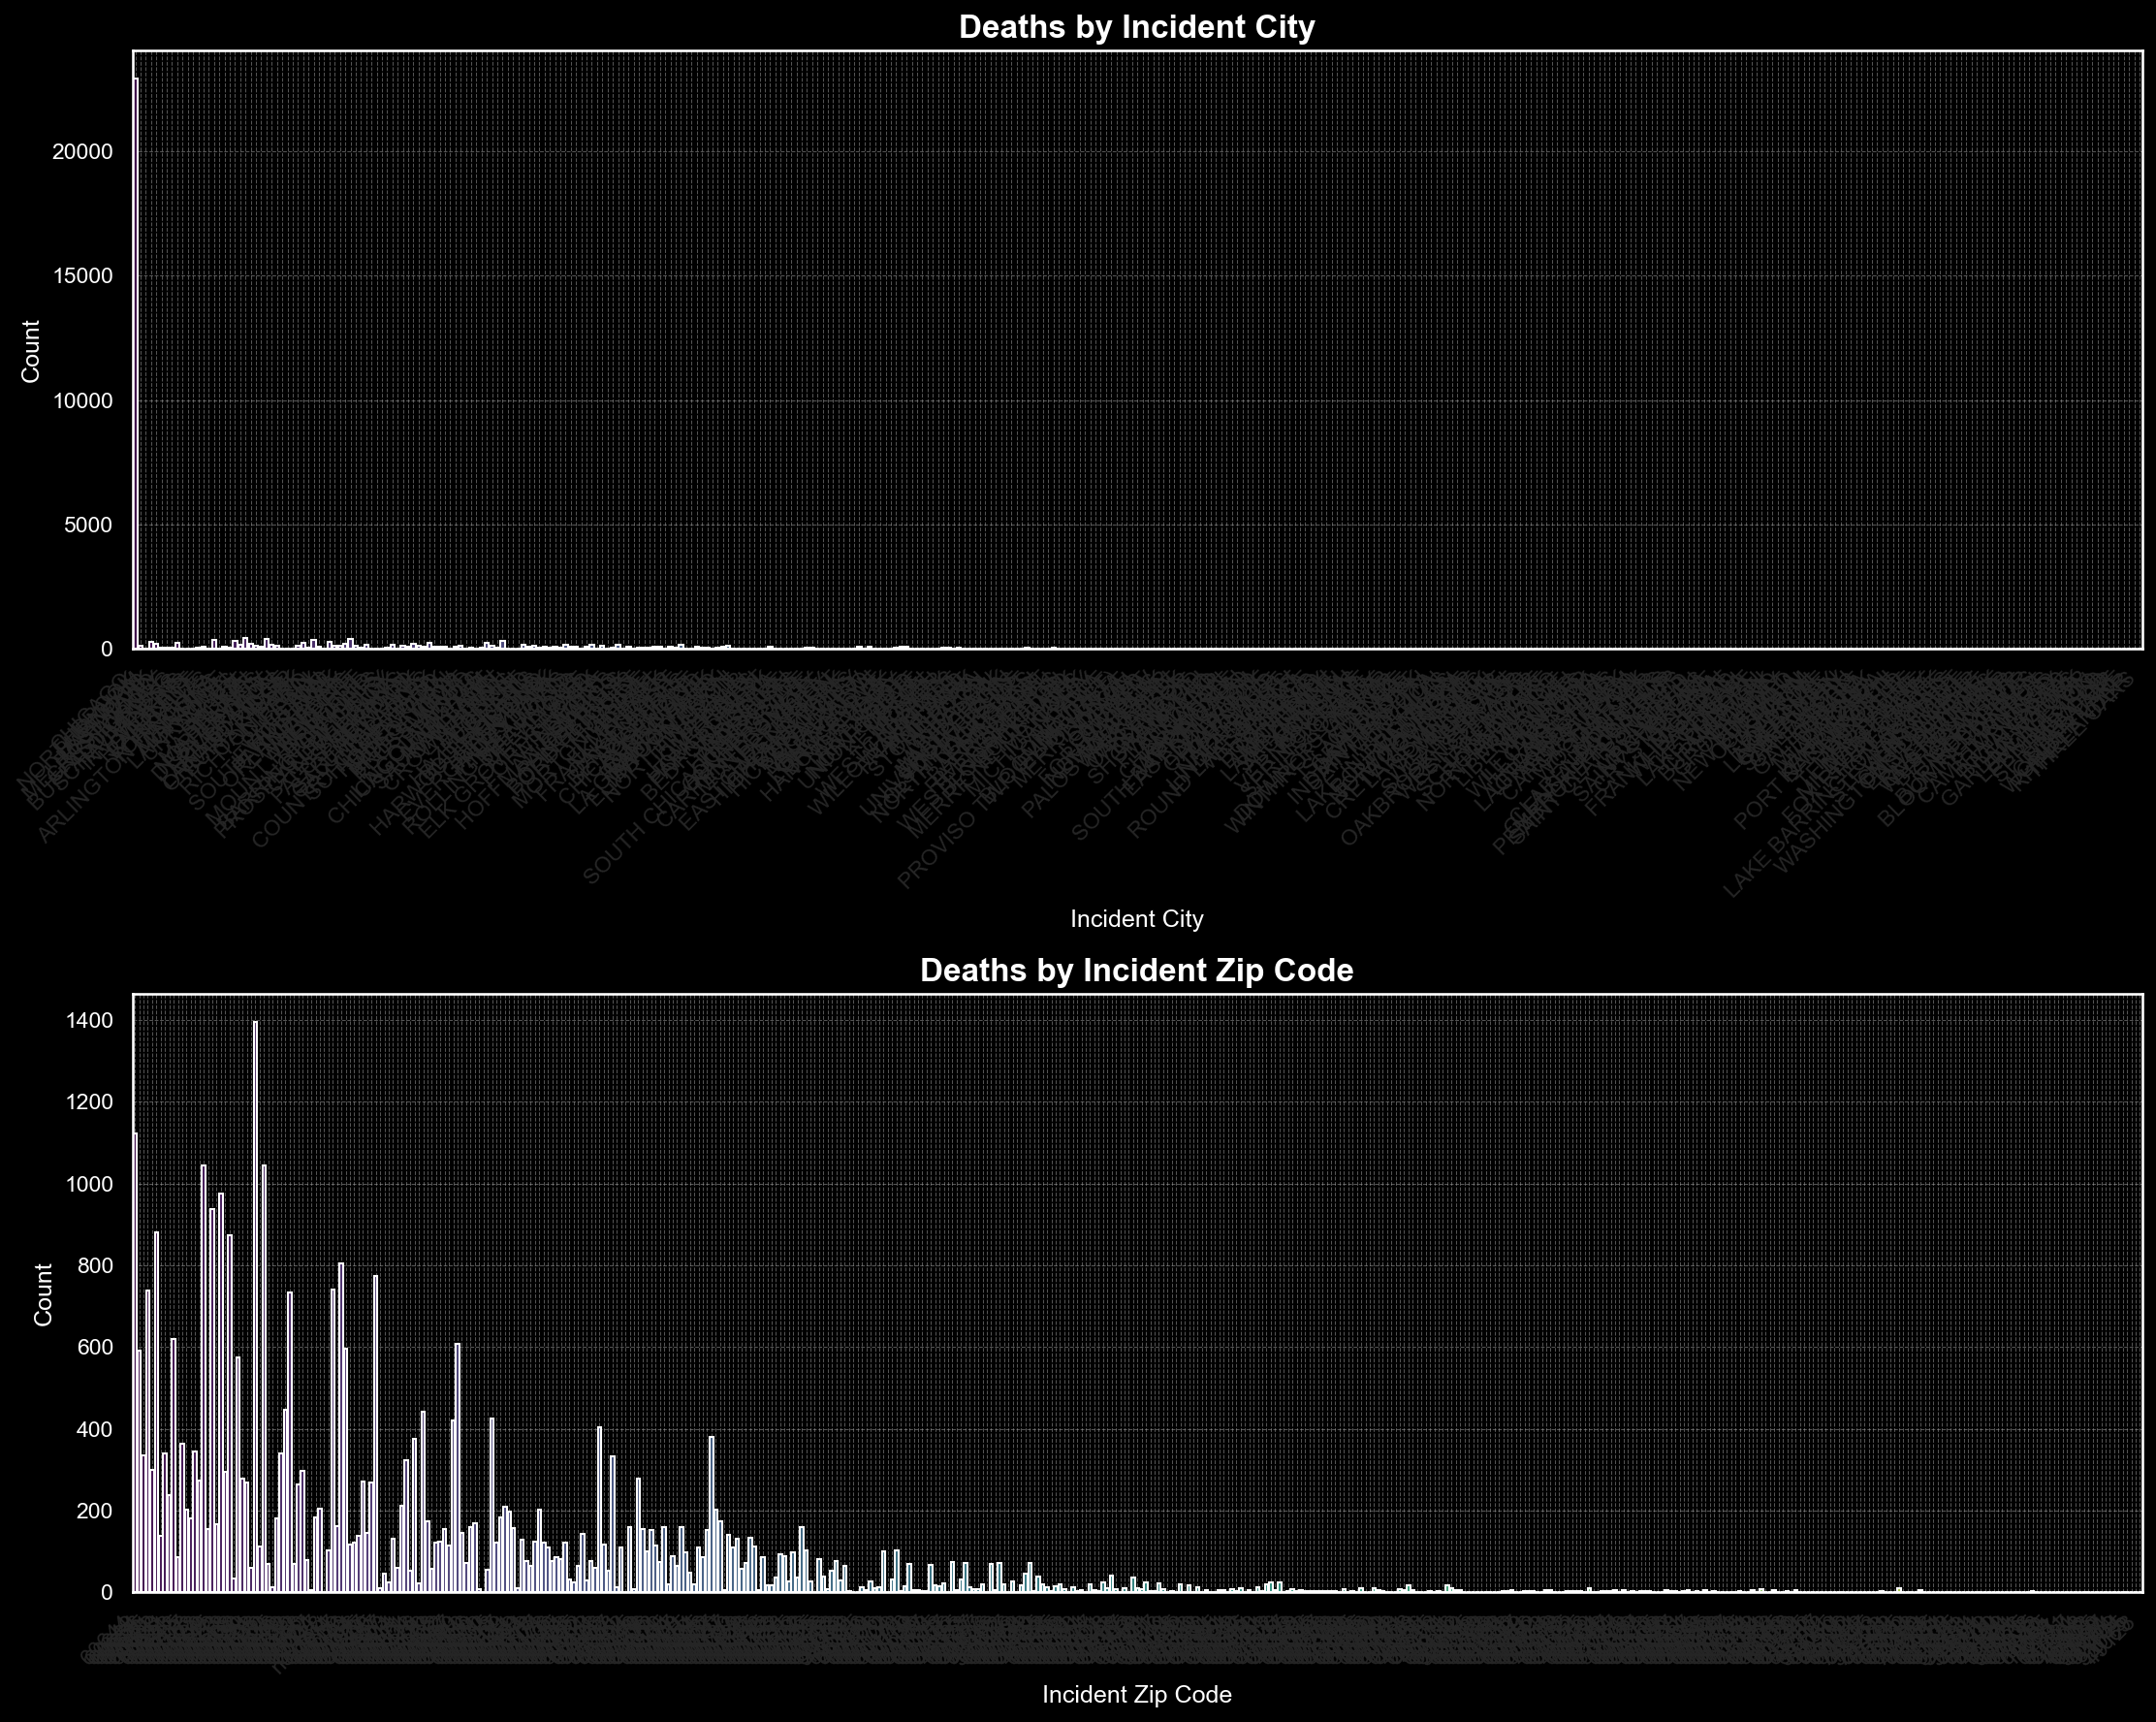

In [148]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), dpi=150, facecolor='black')

# Analyze deaths by incident city
ax = axes[0]
sns.countplot(data=df, x='incident_city', palette='viridis', ax=ax)
ax.set_title('Deaths by Incident City', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Incident City', color='white')
ax.set_ylabel('Count', color='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Analyze deaths by incident zip code
ax = axes[1]
sns.countplot(data=df, x='incident_zip_code', palette='viridis', ax=ax)
ax.set_title('Deaths by Incident Zip Code', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Incident Zip Code', color='white')
ax.set_ylabel('Count', color='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('black')
ax.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plots
plt.tight_layout()
plt.show()


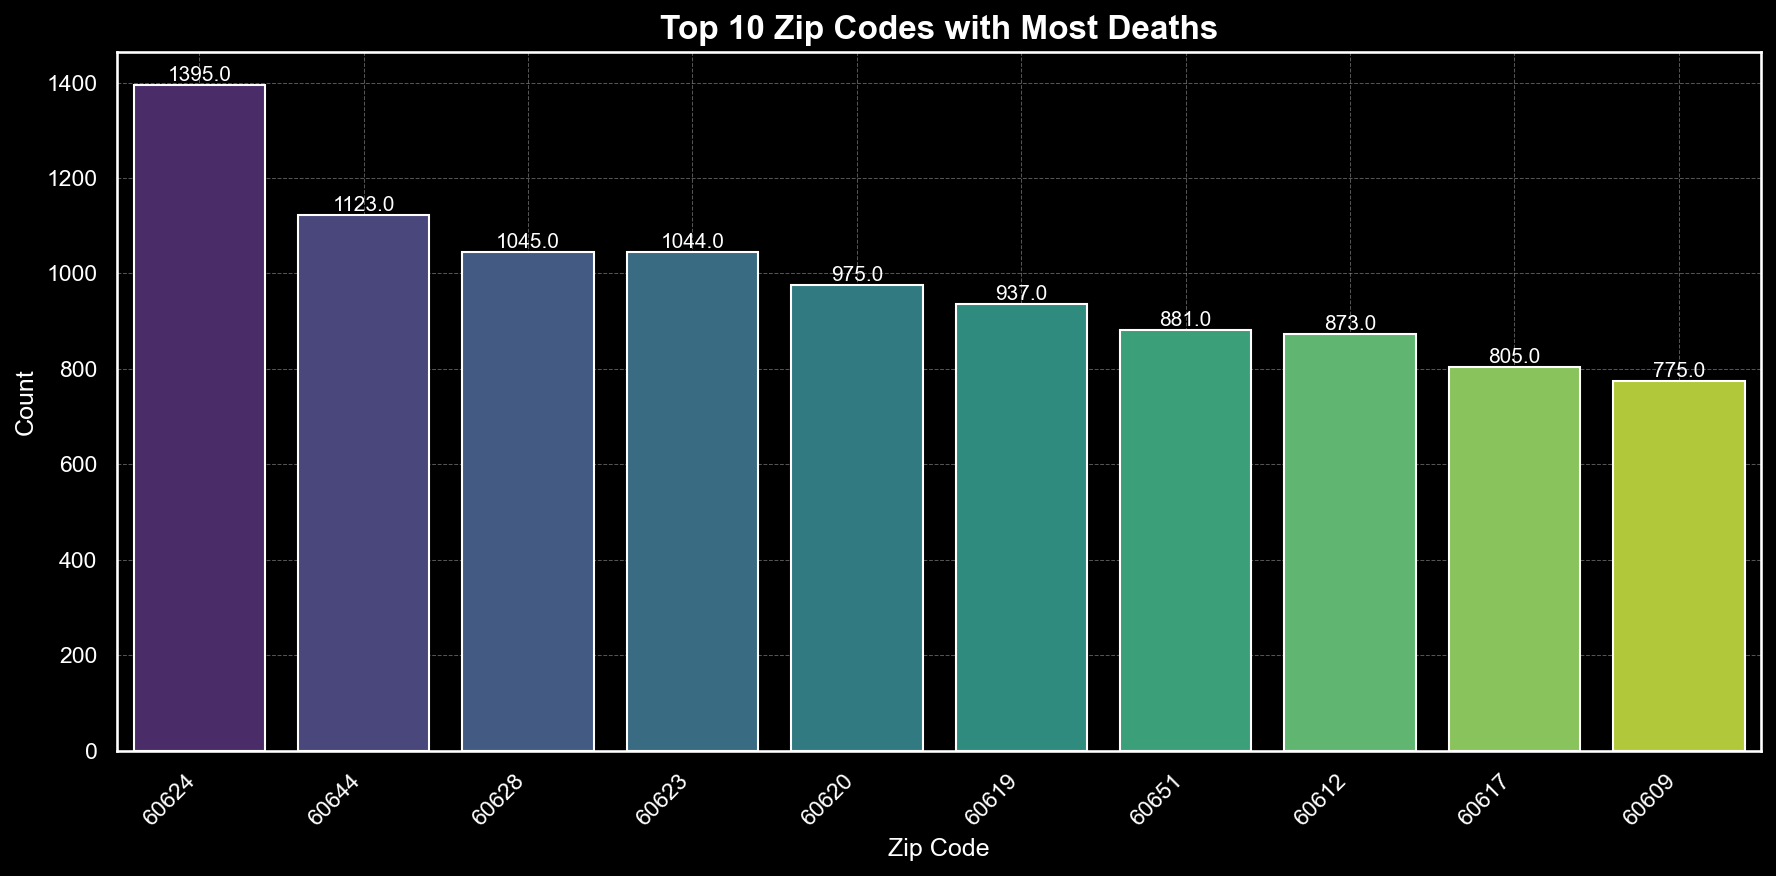

In [152]:
# Get the top 10 zip codes with the most deaths
top_zip_codes = df['incident_zip_code'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6), dpi=150, facecolor='black')
bar_plot = sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values, palette='viridis')

# Display counts on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='white', fontsize=10)

plt.title('Top 10 Zip Codes with Most Deaths', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Zip Code', color='white')
plt.ylabel('Count', color='white')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.gca().set_facecolor('black')
plt.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

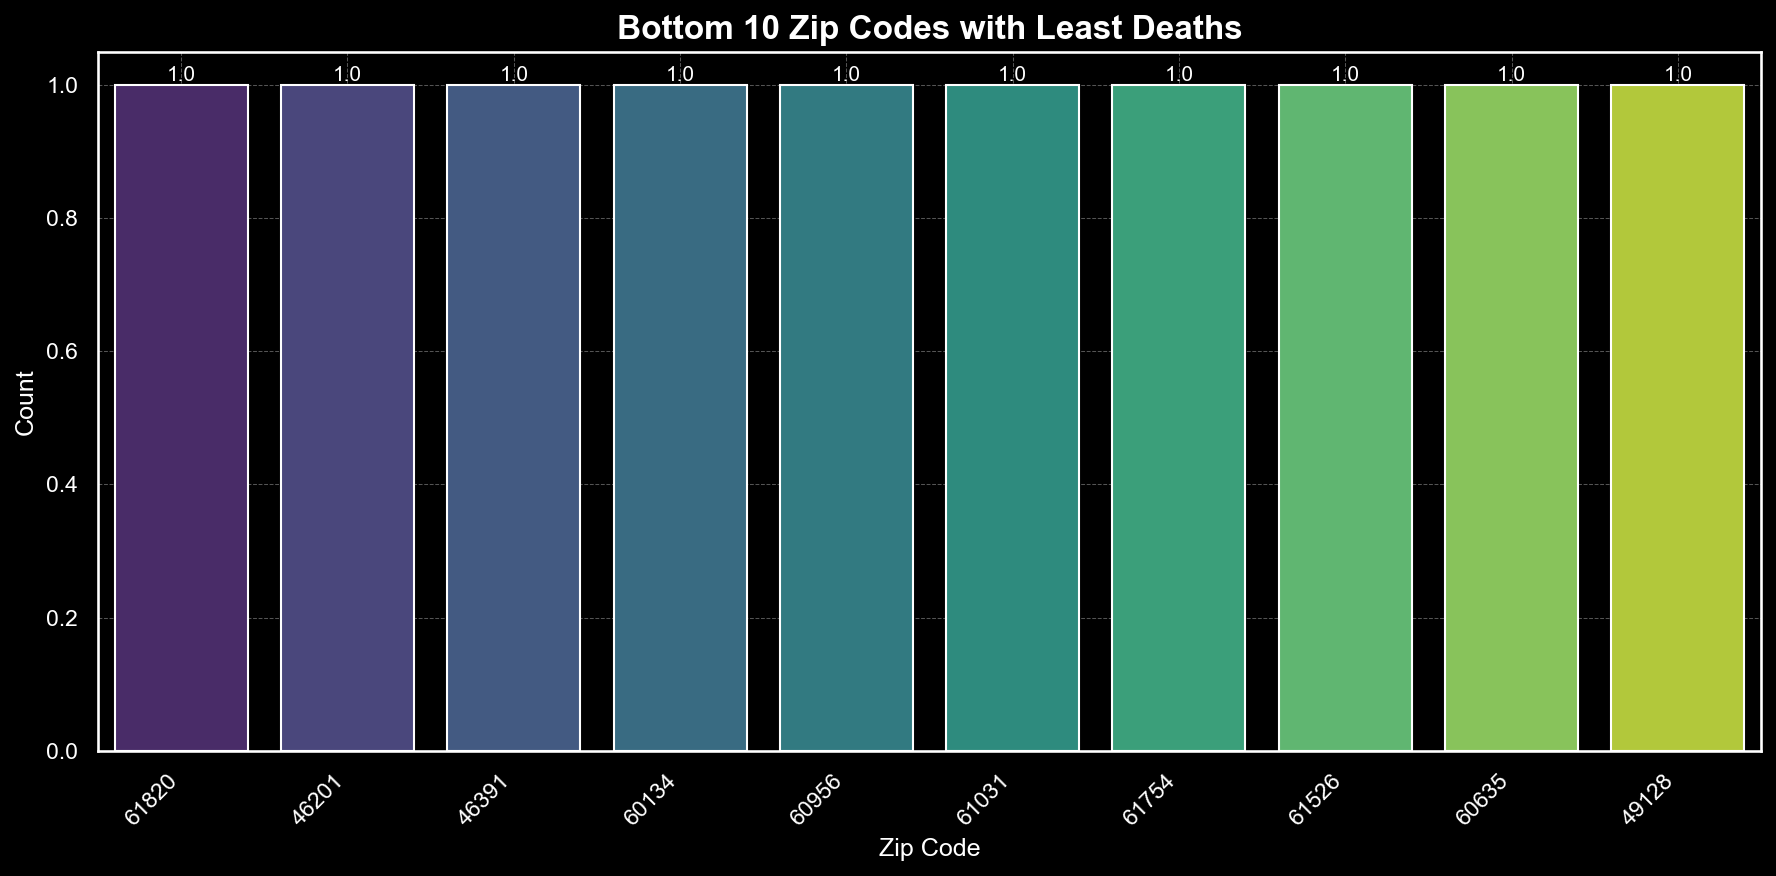

In [153]:
# Get the bottom 10 zip codes with the least deaths
bottom_zip_codes = df['incident_zip_code'].value_counts().tail(10)

# Create a bar plot
plt.figure(figsize=(12, 6), dpi=150, facecolor='black')
bar_plot = sns.barplot(x=bottom_zip_codes.index, y=bottom_zip_codes.values, palette='viridis')

# Display counts on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='white', fontsize=10)

plt.title('Bottom 10 Zip Codes with Least Deaths', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Zip Code', color='white')
plt.ylabel('Count', color='white')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.gca().set_facecolor('black')
plt.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

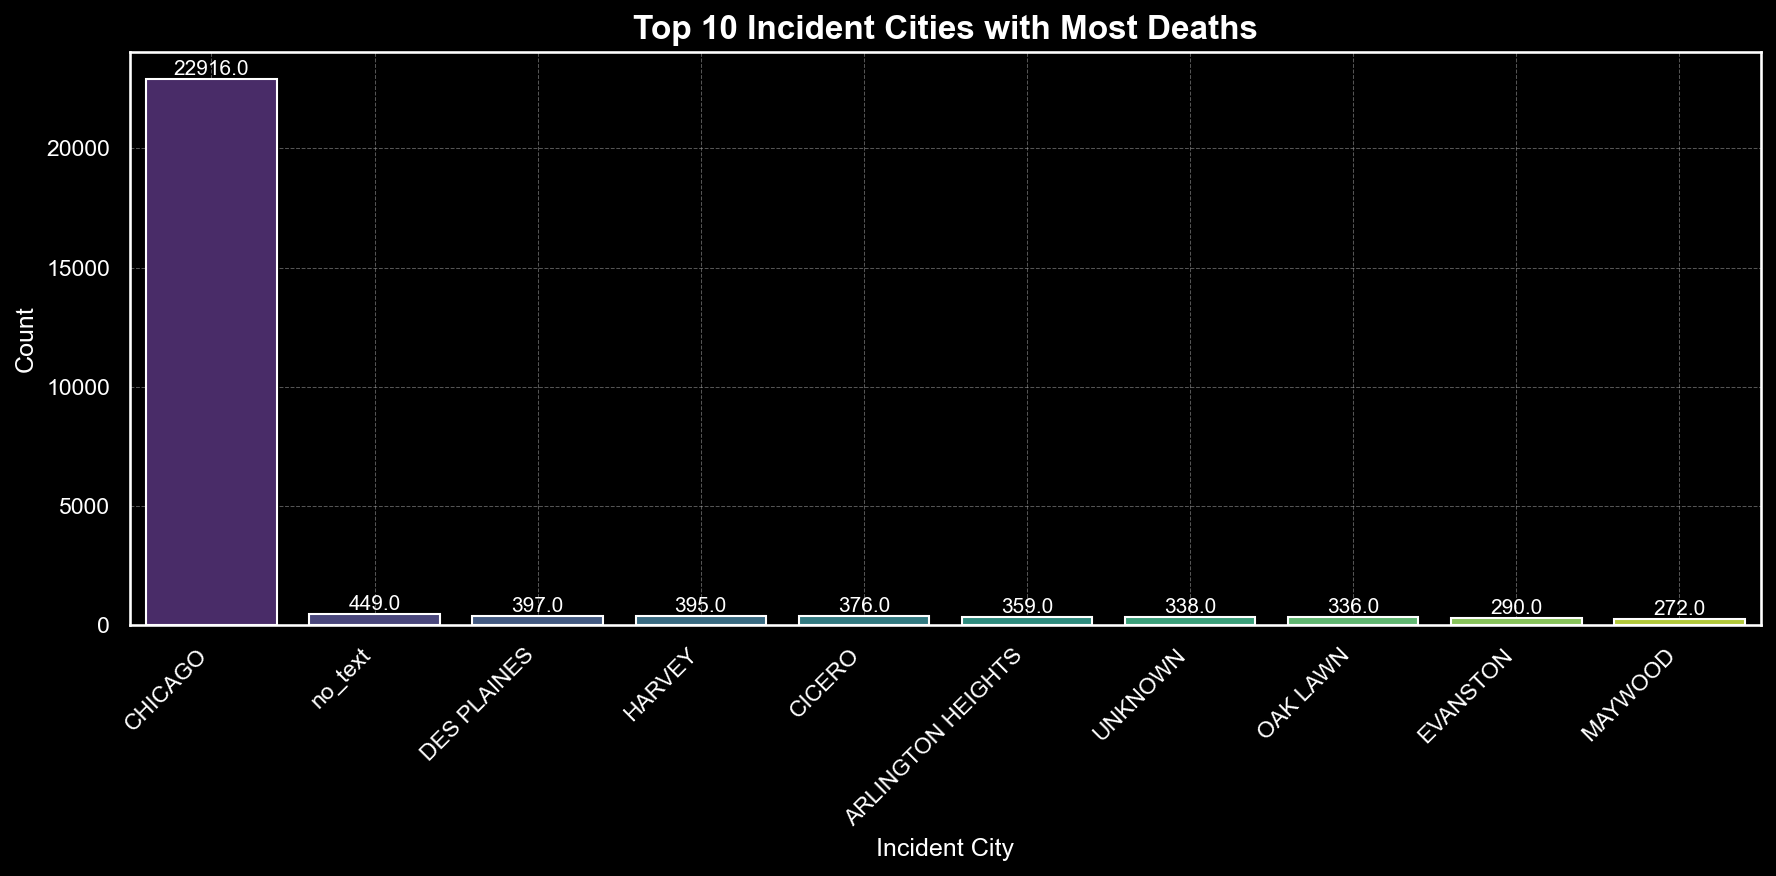

In [154]:
# Get the top 10 incident cities with the most deaths
top_incident_cities = df['incident_city'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6), dpi=150, facecolor='black')
bar_plot = sns.barplot(x=top_incident_cities.index, y=top_incident_cities.values, palette='viridis')

# Display counts on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='white', fontsize=10)

plt.title('Top 10 Incident Cities with Most Deaths', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Incident City', color='white')
plt.ylabel('Count', color='white')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.gca().set_facecolor('black')
plt.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

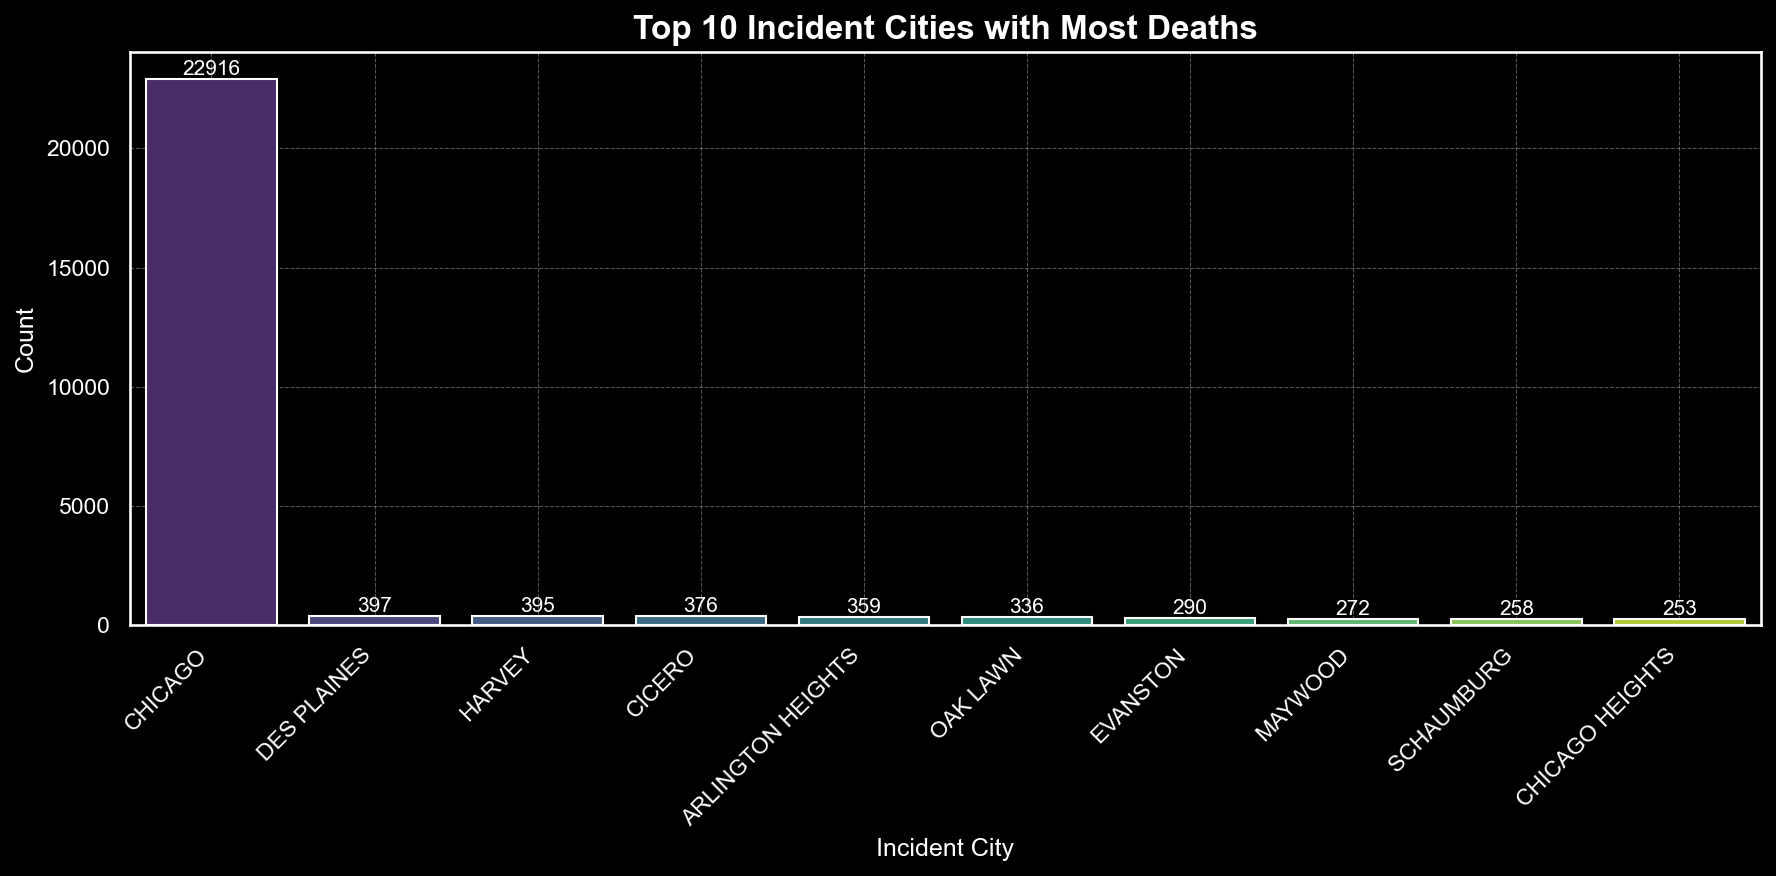

In [157]:
# Filter out 'no_text' and 'UNKNOWN' from the incident city data
filtered_df = df[(df['incident_city'] != 'no_text') & (df['incident_city'] != 'UNKNOWN')]

# Get the top 10 incident cities with the most deaths
top_incident_cities = filtered_df['incident_city'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6), dpi=150, facecolor='black')
bar_plot = sns.barplot(x=top_incident_cities.index, y=top_incident_cities.values, palette='viridis')

# Display counts on top of the bars for bars with text
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='white', fontsize=10)

plt.title('Top 10 Incident Cities with Most Deaths', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Incident City', color='white')
plt.ylabel('Count', color='white')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.gca().set_facecolor('black')
plt.grid(color='darkgray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()